In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import auc,classification_report,confusion_matrix

In [3]:
# defining the model path
model_path = '/content/base_medical_model.h5'

In [4]:
# loading the saved model to check the accuracy on new data
mymodel = tf.keras.models.load_model(model_path)

In [12]:
! mkdir /content/cross_dataset

In [13]:
# rescaling and showing images 
cross_data_path = '/content/cross_dataset/*'
from glob import glob

dataset = glob(cross_data_path)
dataset[:10]

['/content/cross_dataset/ct (250).png',
 '/content/cross_dataset/ct (72).png',
 '/content/cross_dataset/ct (107).png',
 '/content/cross_dataset/xray (142).jpeg',
 '/content/cross_dataset/ct (178).png',
 '/content/cross_dataset/ct (179).png',
 '/content/cross_dataset/xray (41).jpeg',
 '/content/cross_dataset/xray (138).jpeg',
 '/content/cross_dataset/xray (122).jpeg',
 '/content/cross_dataset/ct (198).png']

In [26]:
# load all images, rescale and store to image array
img_arr = list()
for item in dataset:
  img = tf.keras.preprocessing.image.load_img(item, target_size=(124,124))
  img = tf.keras.preprocessing.image.img_to_array(img)
  img_arr.append(img)

In [27]:
# image array shape and size
img_arr = np.asarray(img_arr)
img_arr.shape,img_arr.size

((516, 124, 124, 3), 23802048)

In [24]:
len(img_arr)

516

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


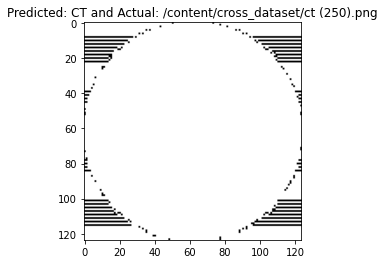

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


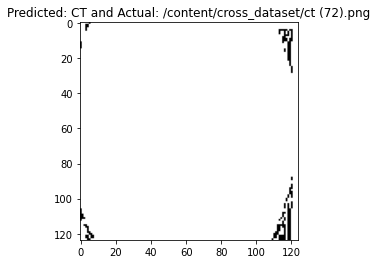

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


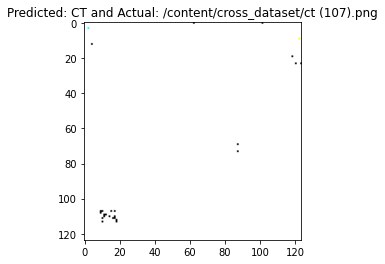

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.0236491 0.9763509]


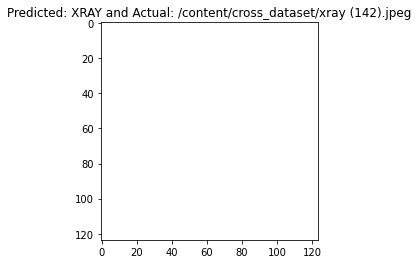

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


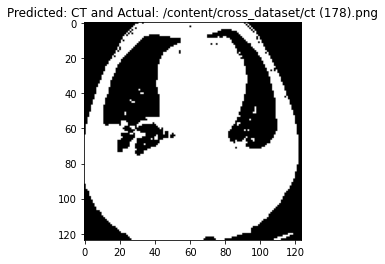

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


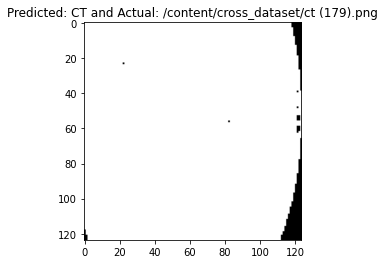

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.5548777e-04 9.9924457e-01]


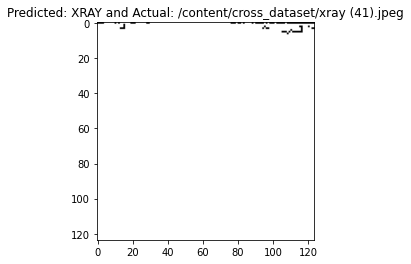

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.7910827e-04 9.9902093e-01]


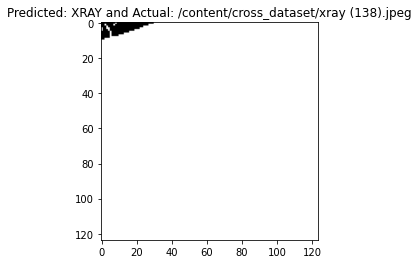

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.0104358e-05 9.9996984e-01]


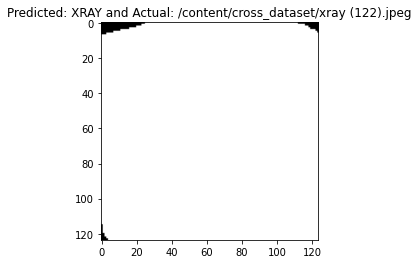

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


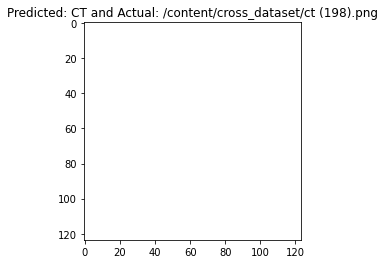

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


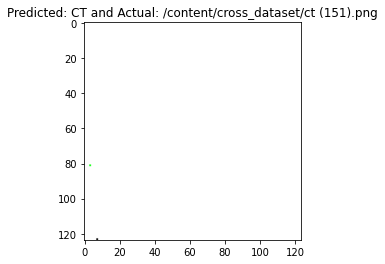

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


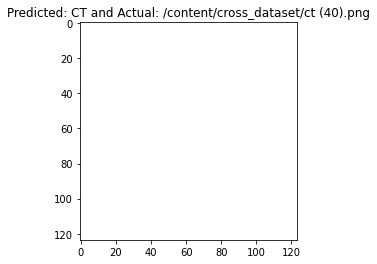

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


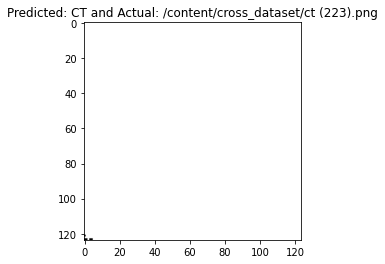

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.4553099e-05 9.9990547e-01]


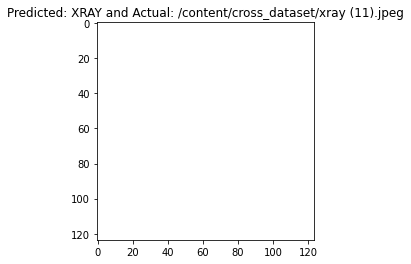

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


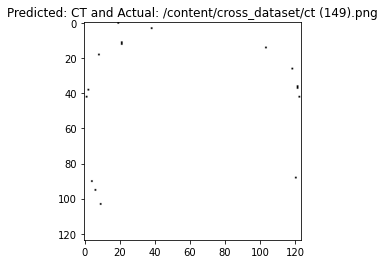

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


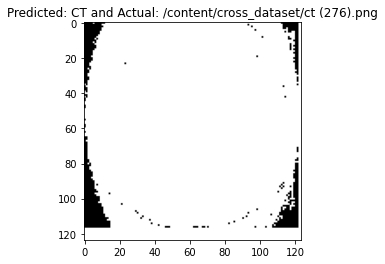

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


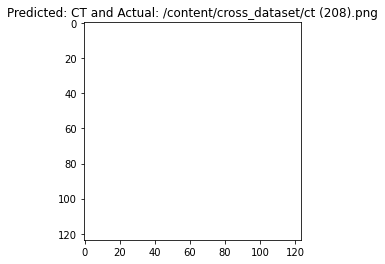

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


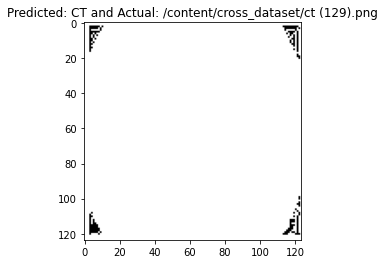

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


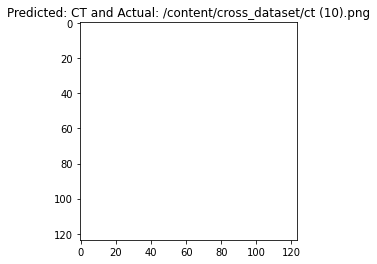

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


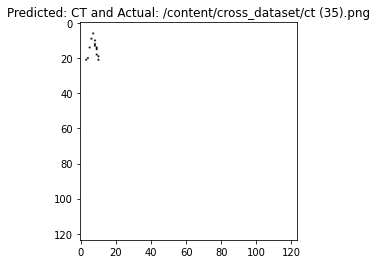

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


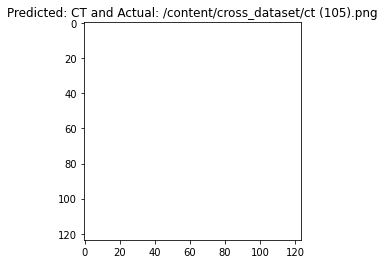

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


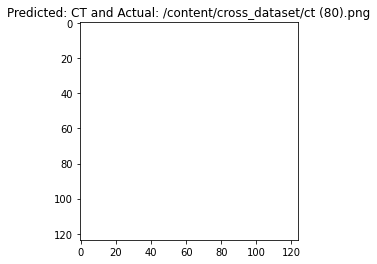

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


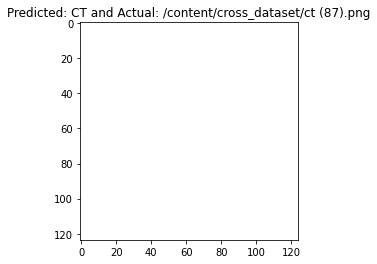

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


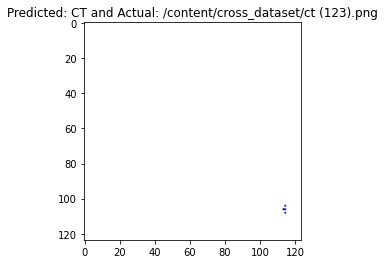

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


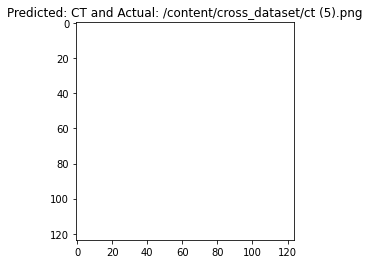

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.5827725e-04 9.9934167e-01]


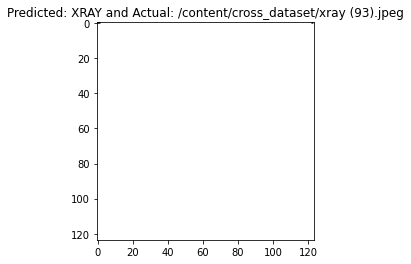

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


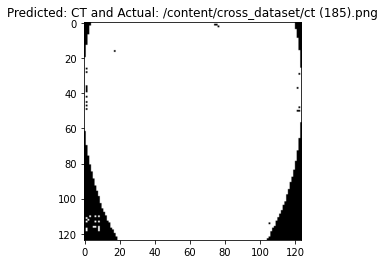

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


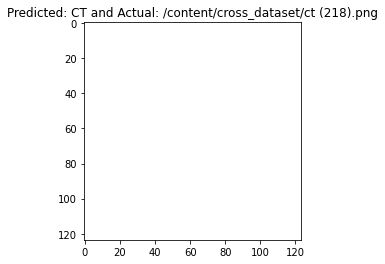

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


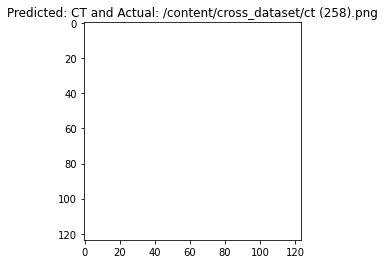

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


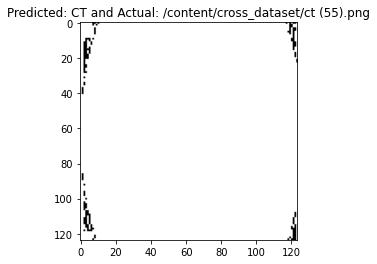

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


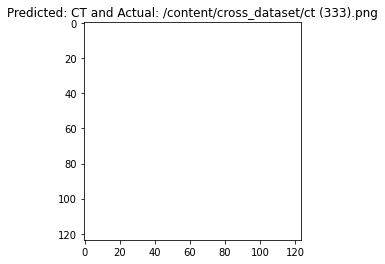

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


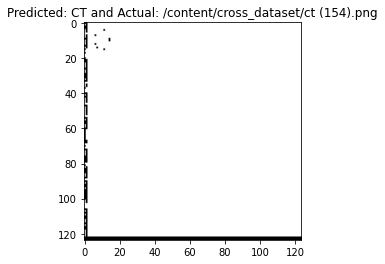

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.02670242 0.97329766]


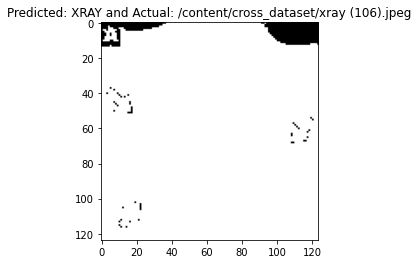

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


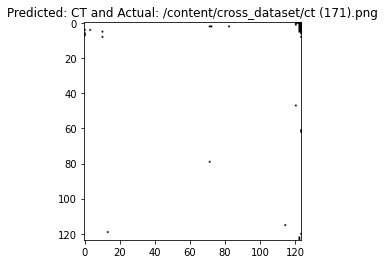

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


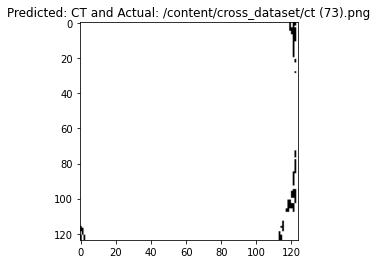

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


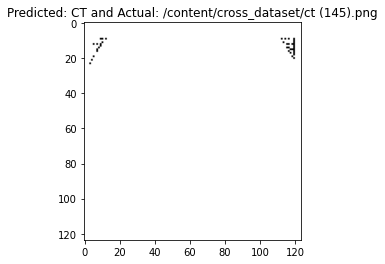

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


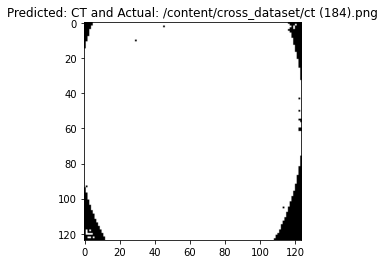

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


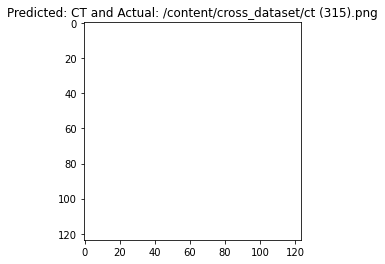

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00124674 0.9987533 ]


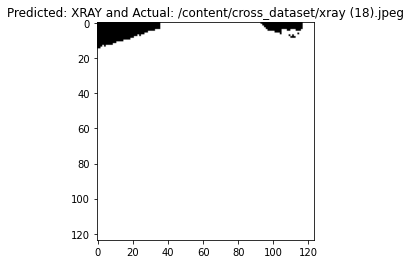

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


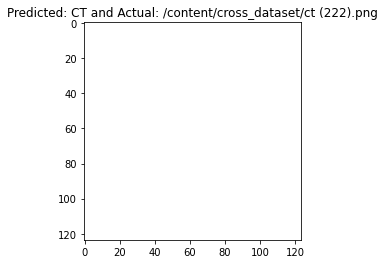

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


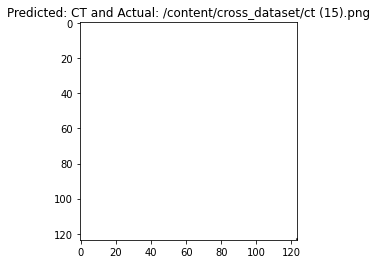

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


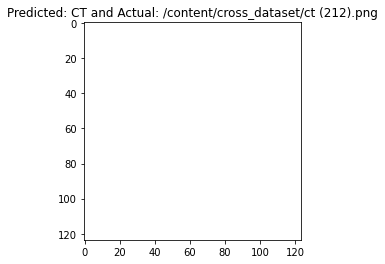

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


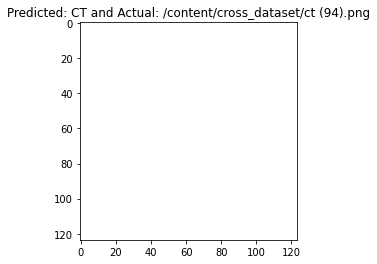

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


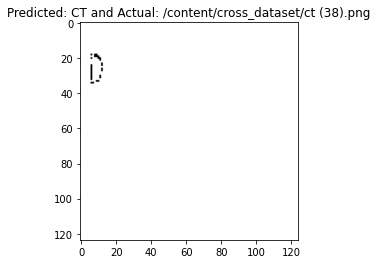

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.0993124e-04 9.9939001e-01]


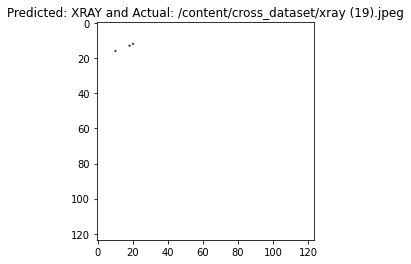

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


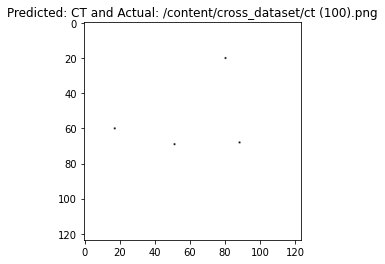

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


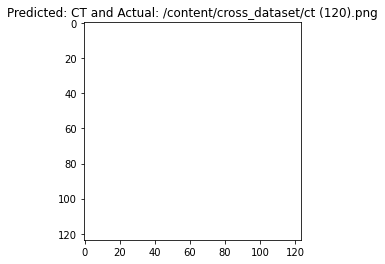

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


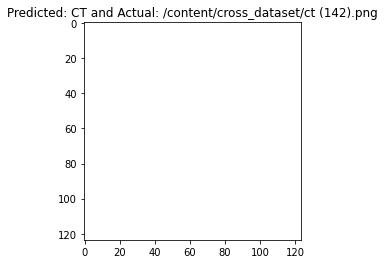

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.3087449e-04 9.9976915e-01]


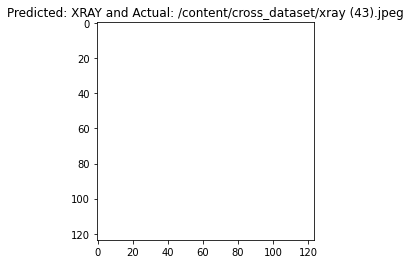

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


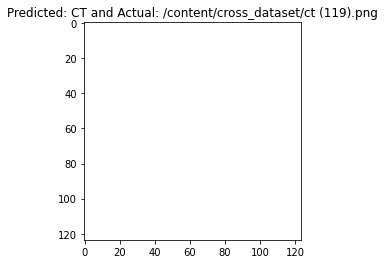

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


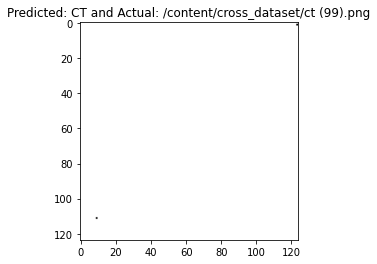

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


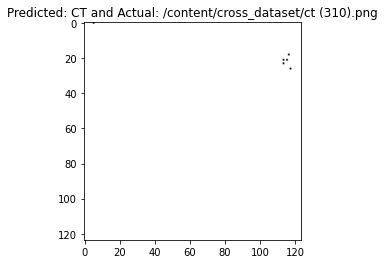

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


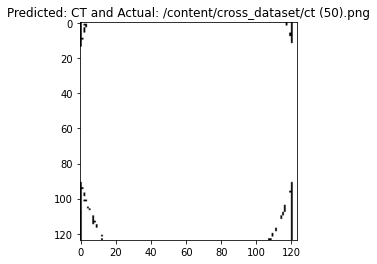

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


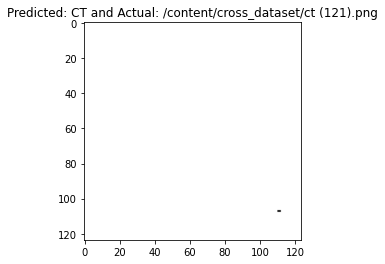

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


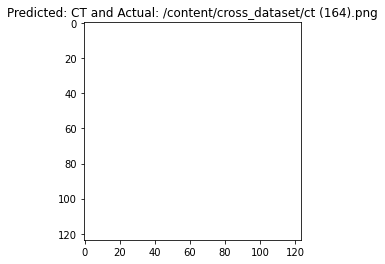

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.6547201e-04 9.9983454e-01]


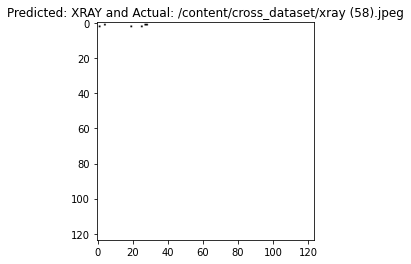

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


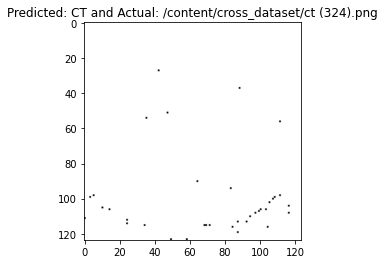

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.8130742e-04 9.9981874e-01]


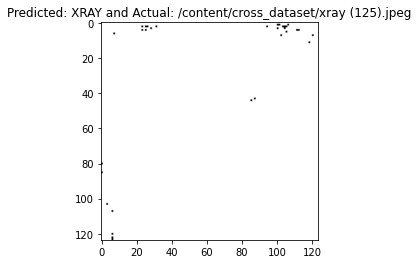

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


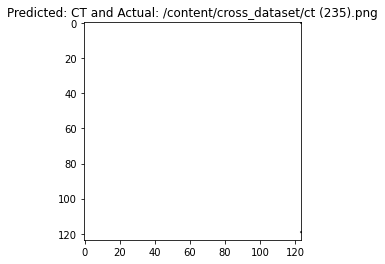

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.334345e-05 9.999367e-01]


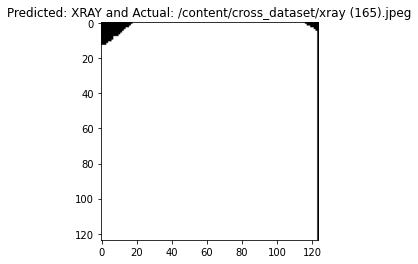

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00187564 0.9981243 ]


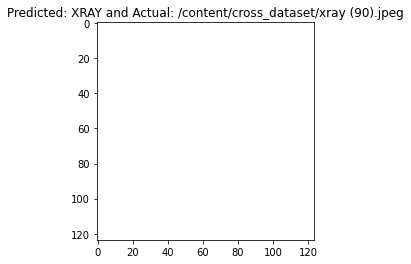

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


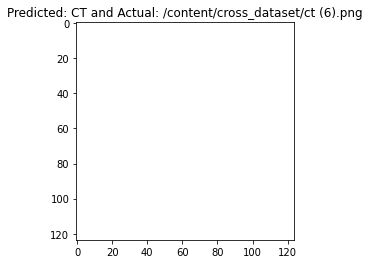

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


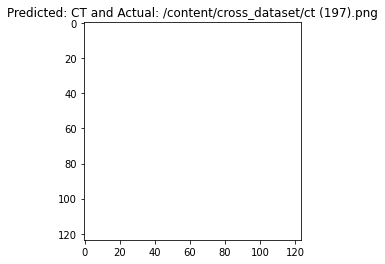

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.01852557 0.98147446]


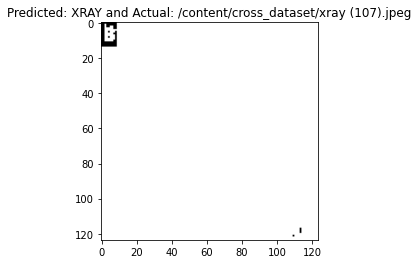

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


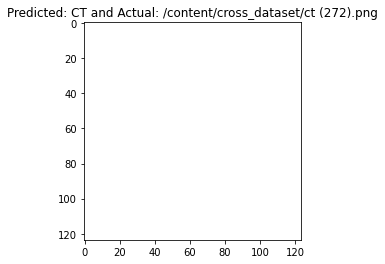

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


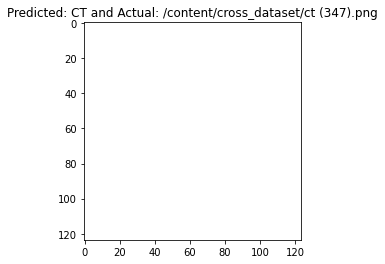

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00115146 0.99884856]


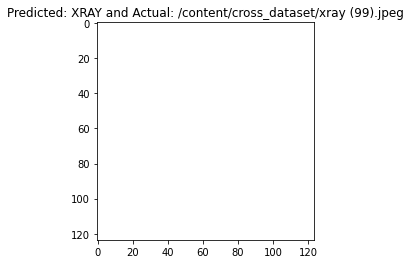

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


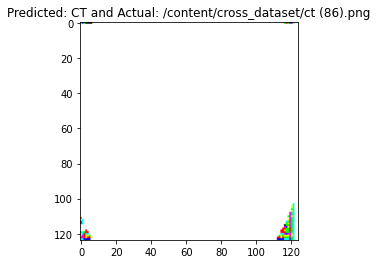

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


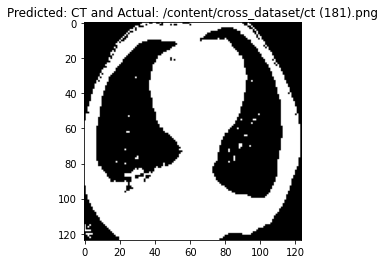

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4.258214e-04 9.995741e-01]


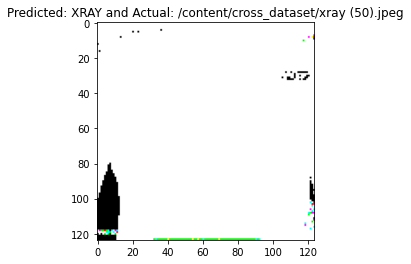

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


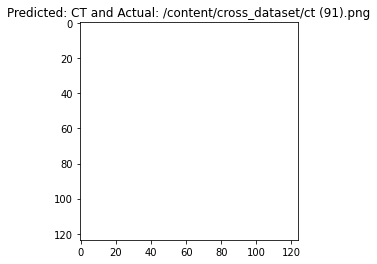

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


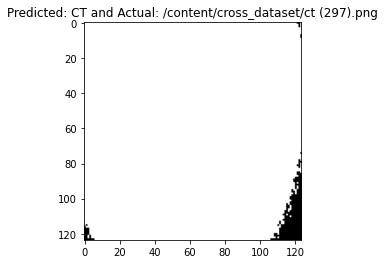

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


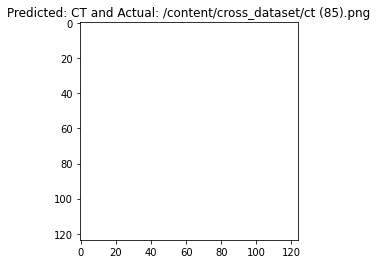

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


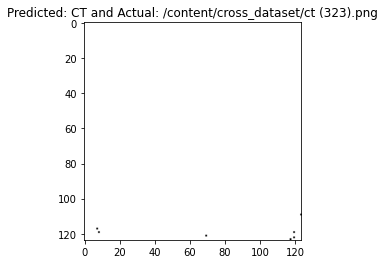

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


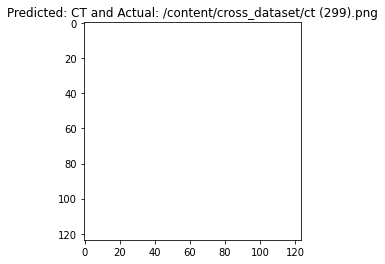

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


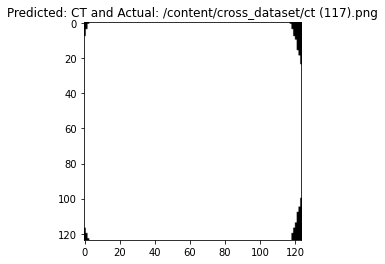

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.0062212  0.99377877]


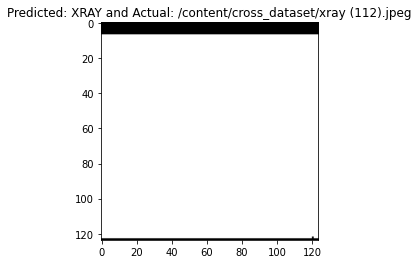

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.93338645 0.06661359]


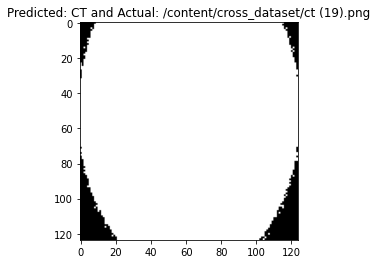

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


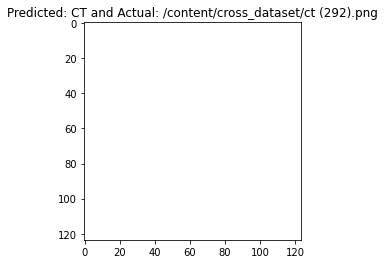

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.4596854e-04 9.9925405e-01]


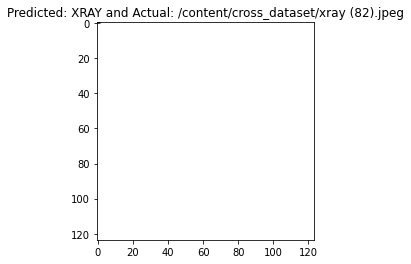

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


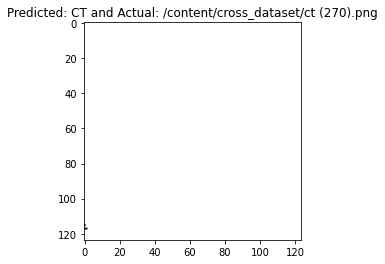

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


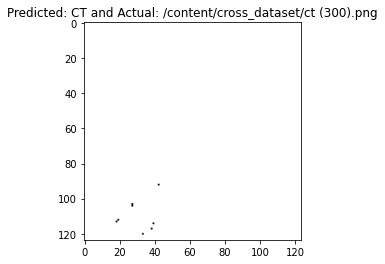

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


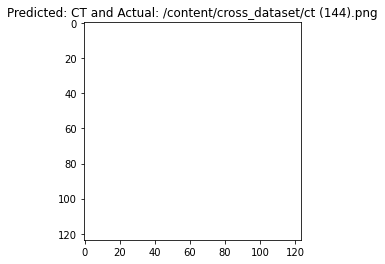

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.6048653e-04 9.9973947e-01]


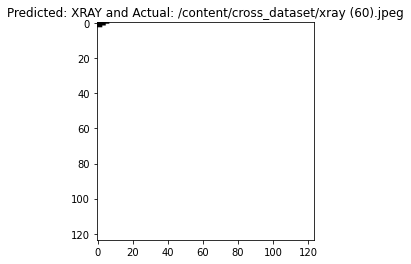

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


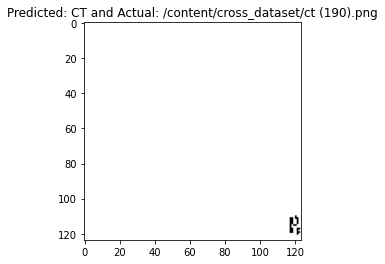

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


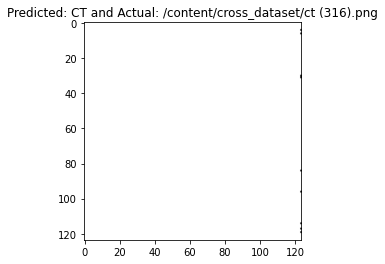

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


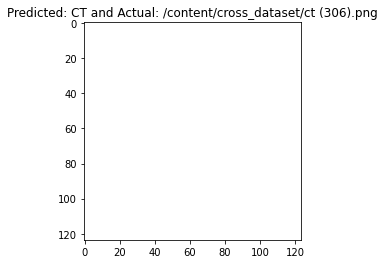

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


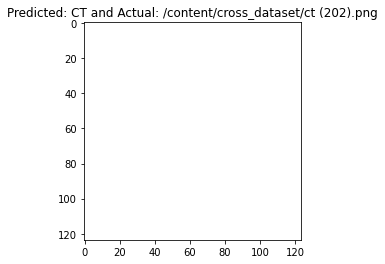

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


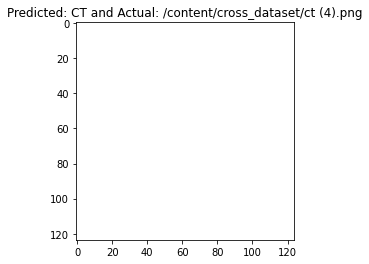

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


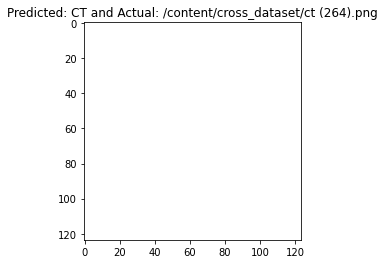

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.9228999  0.07710014]


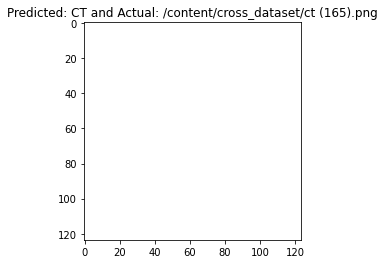

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


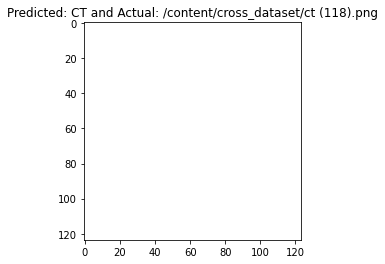

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


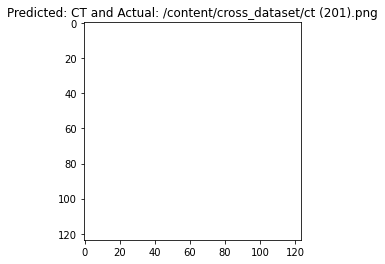

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


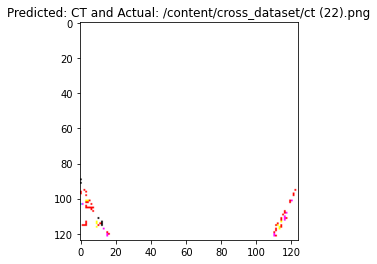

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


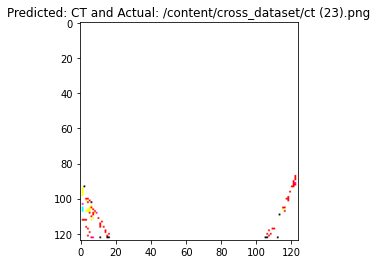

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00103814 0.9989618 ]


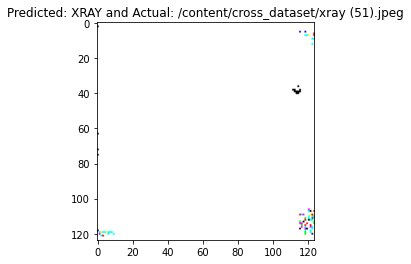

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


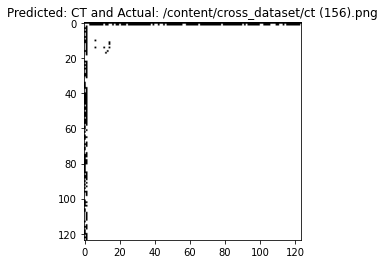

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


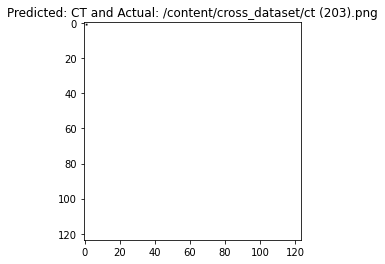

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.999459e-04 9.993000e-01]


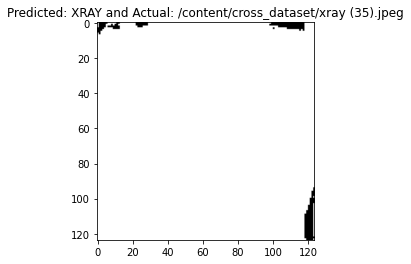

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


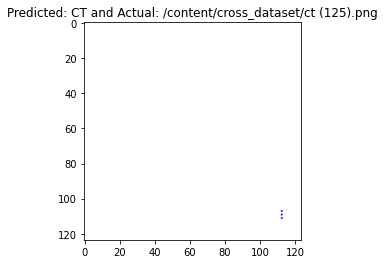

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


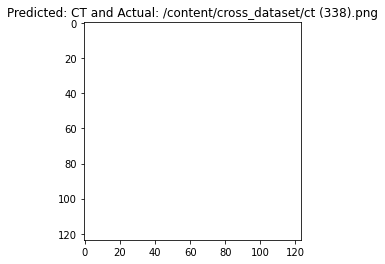

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


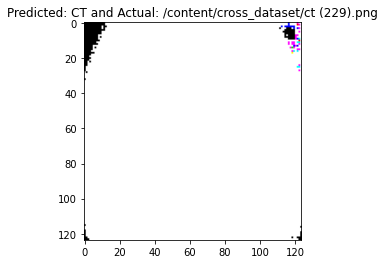

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00106444 0.9989355 ]


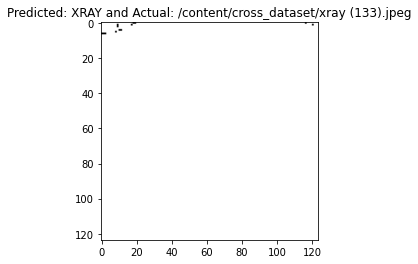

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


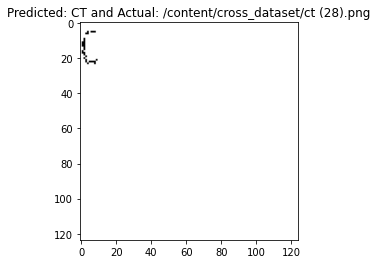

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


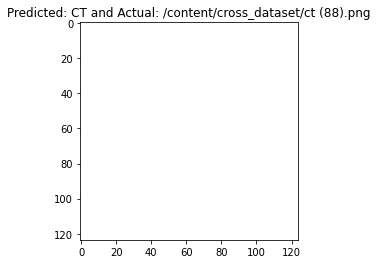

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


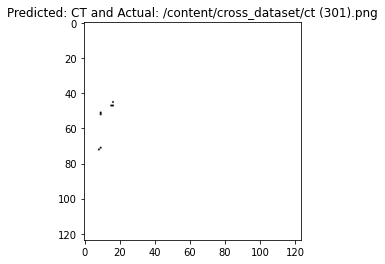

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


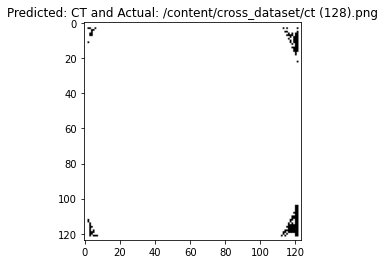

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


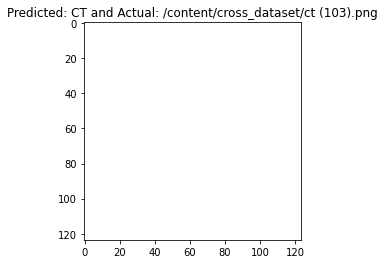

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


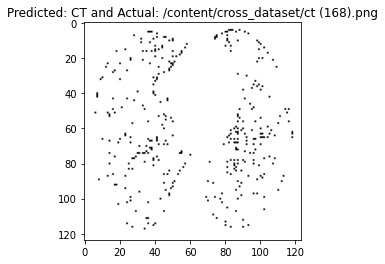

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


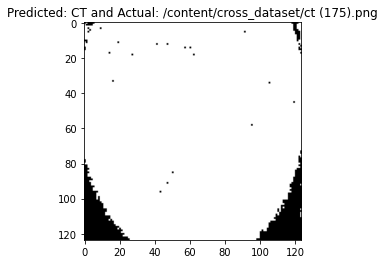

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.4050745e-05 9.9998593e-01]


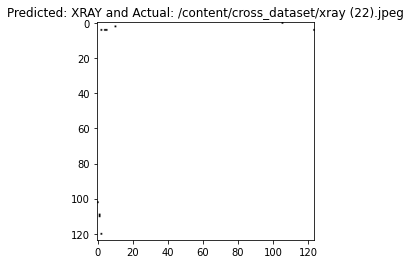

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


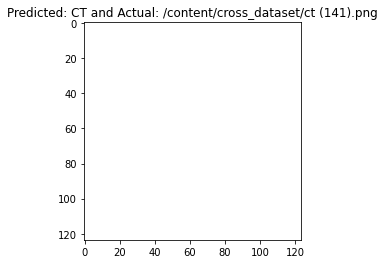

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


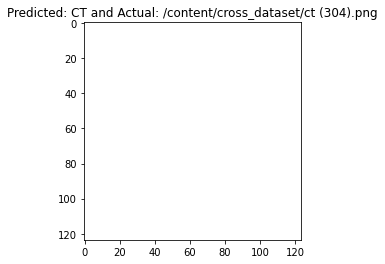

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


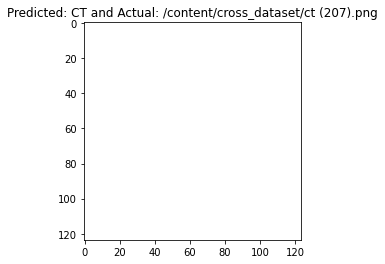

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


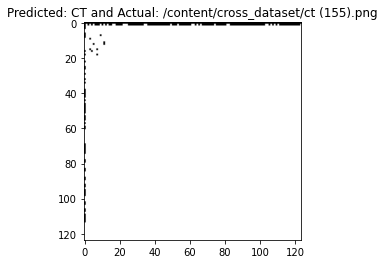

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


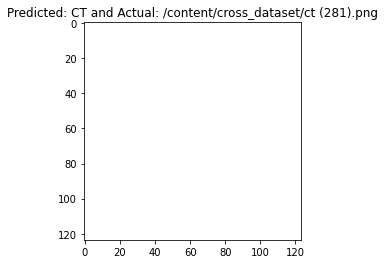

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


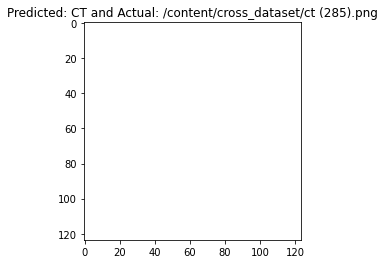

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5.932856e-04 9.994067e-01]


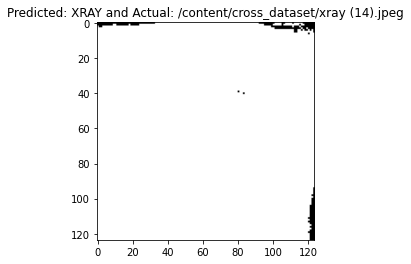

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


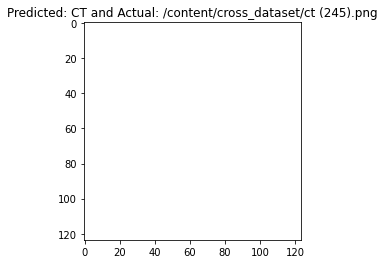

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.001268e-04 9.997999e-01]


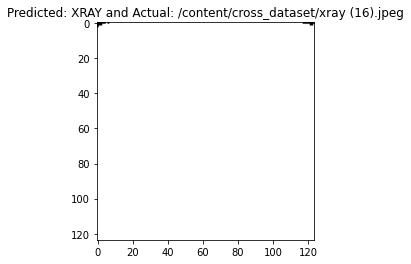

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


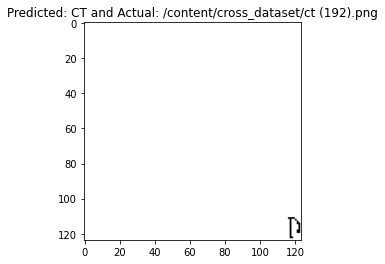

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


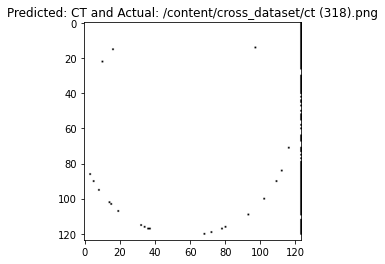

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.5310885e-04 9.9984682e-01]


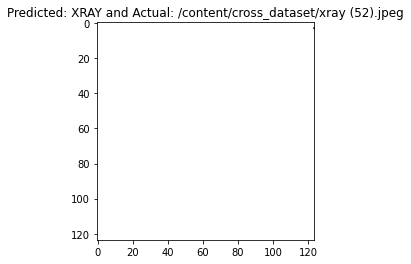

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.6891557e-05 9.9996316e-01]


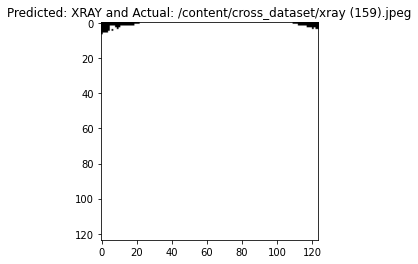

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


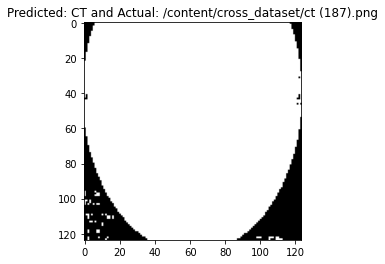

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00444551 0.9955545 ]


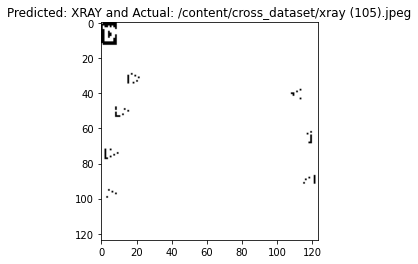

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


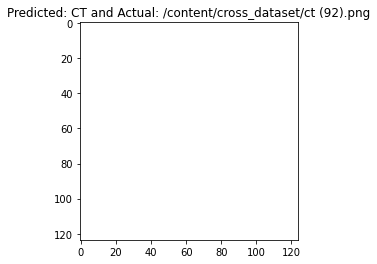

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.4109341e-04 9.9935895e-01]


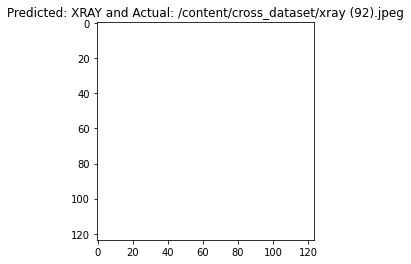

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


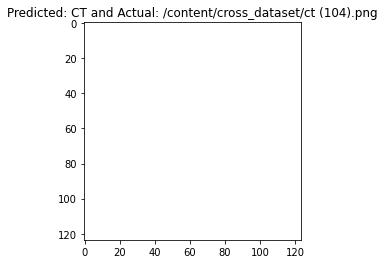

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.4882643e-04 9.9905115e-01]


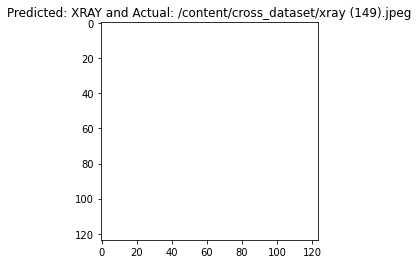

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


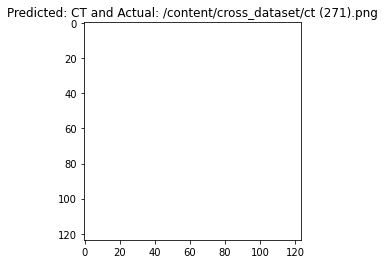

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


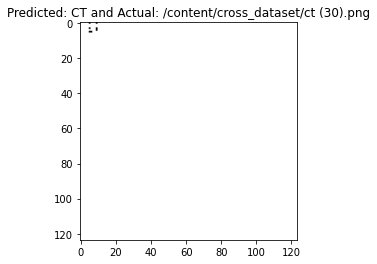

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


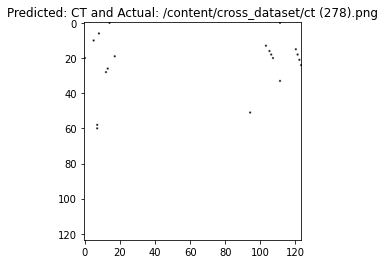

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.93335027 0.06664973]


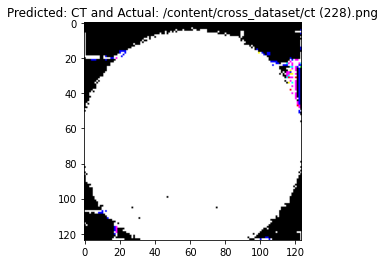

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00181879 0.9981812 ]


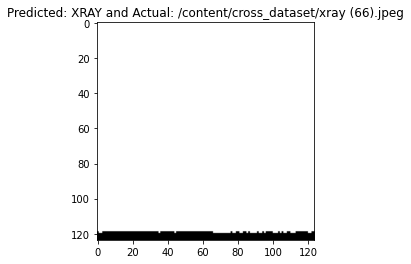

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


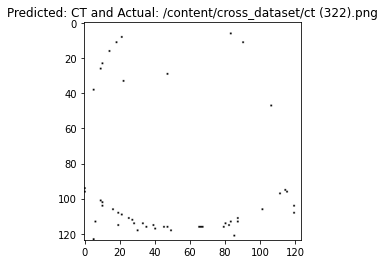

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


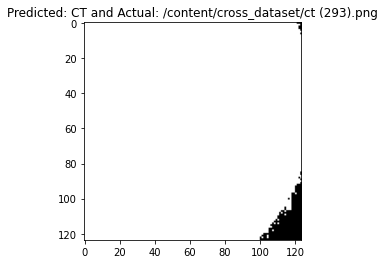

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.8060140e-04 9.9981946e-01]


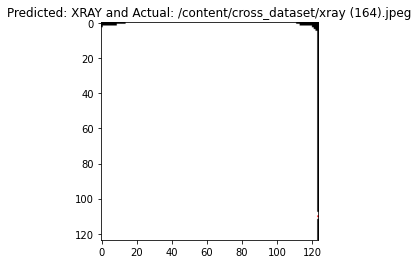

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.271177e-05 9.999273e-01]


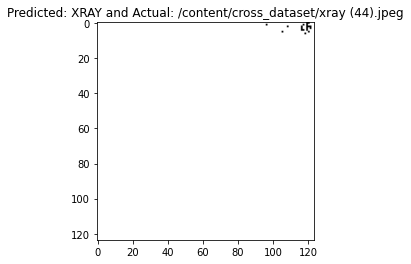

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


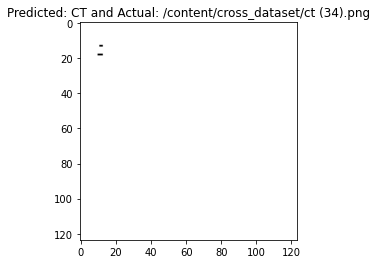

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


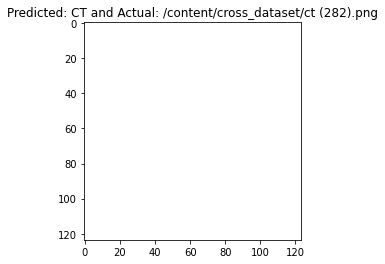

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00107504 0.9989249 ]


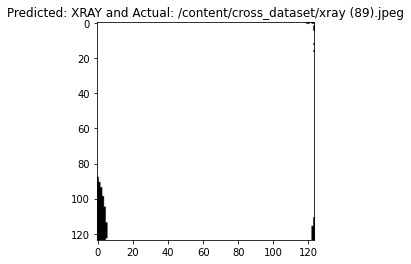

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


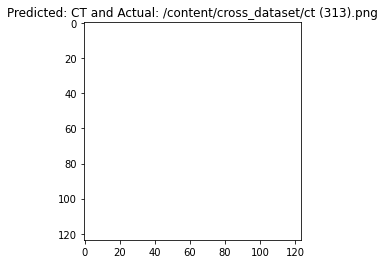

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.6766572e-04 9.9973232e-01]


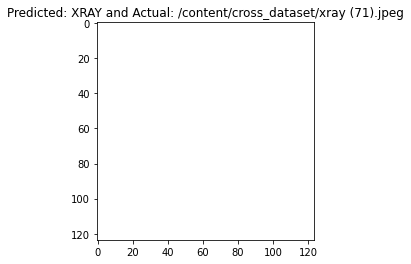

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.1110572e-05 9.9993885e-01]


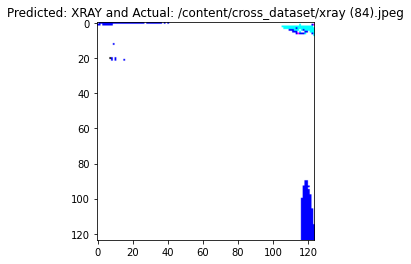

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.468856e-05 9.999653e-01]


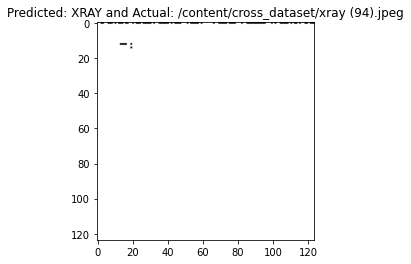

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00127663 0.9987233 ]


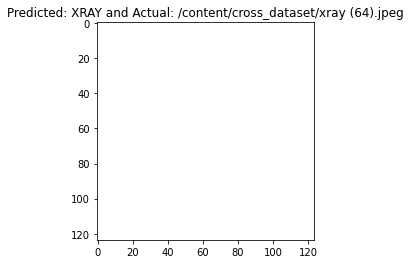

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


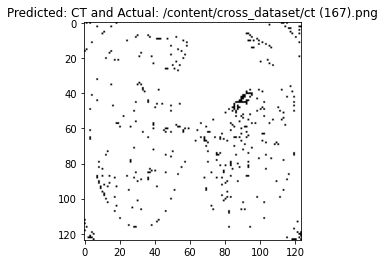

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.0407033e-05 9.9990964e-01]


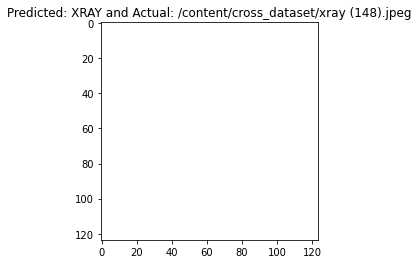

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00116211 0.9988379 ]


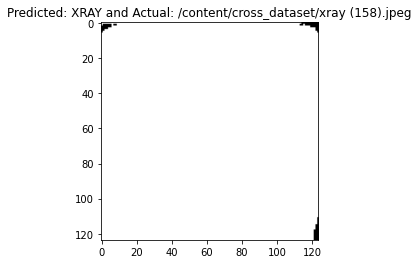

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


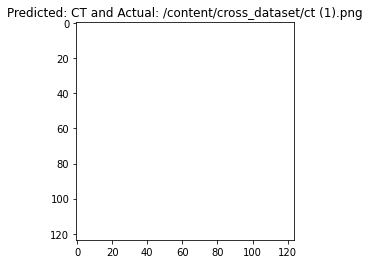

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.0350927e-05 9.9998963e-01]


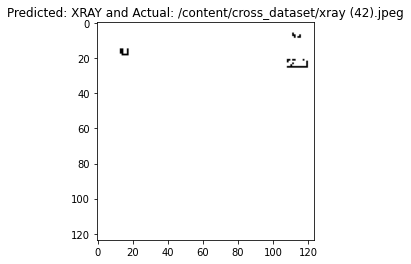

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


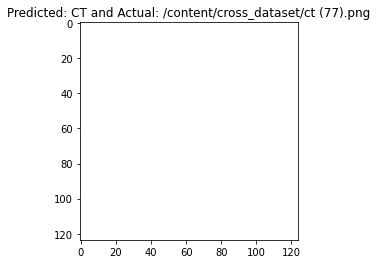

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


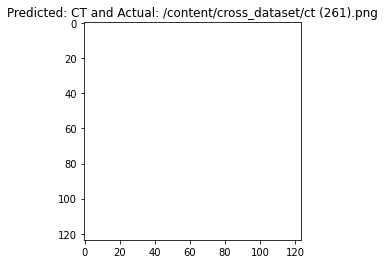

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


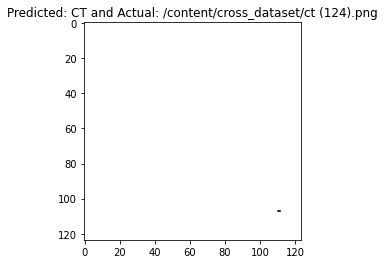

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


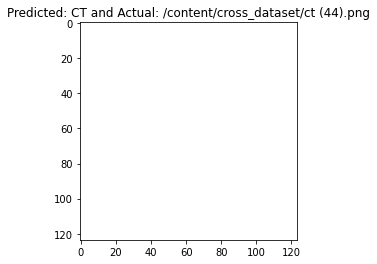

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


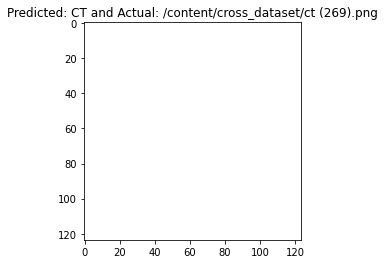

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.91821676 0.08178327]


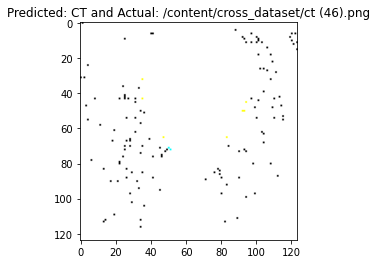

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


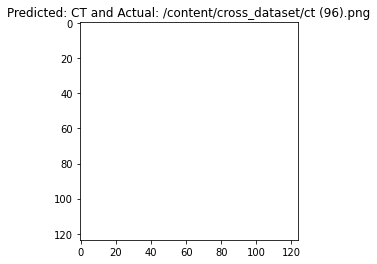

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00101751 0.9989825 ]


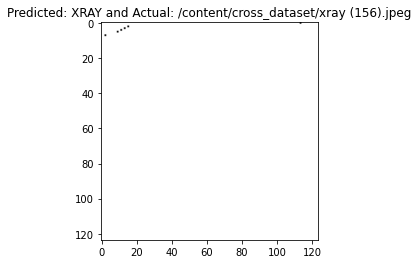

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


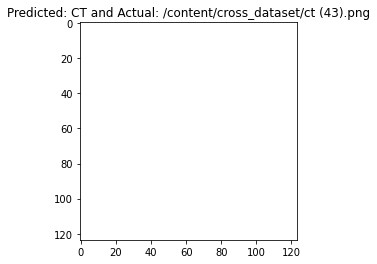

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.92486876 0.07513116]


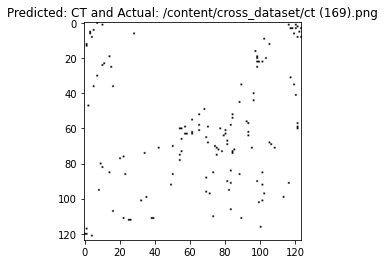

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


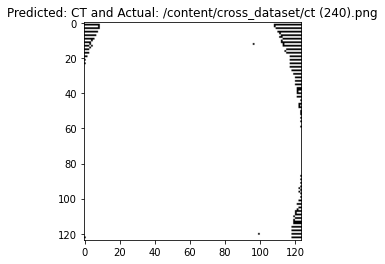

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


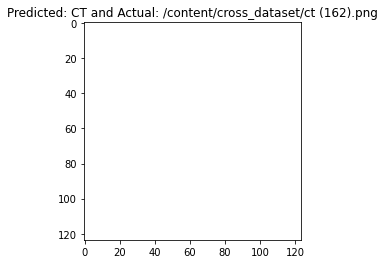

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.8266665e-04 9.9971730e-01]


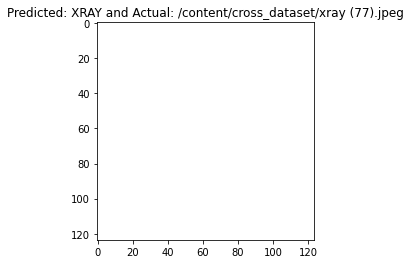

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


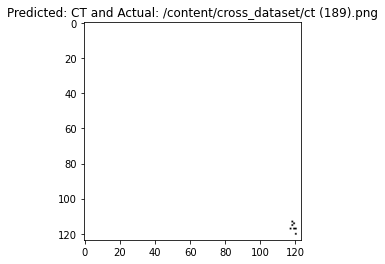

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


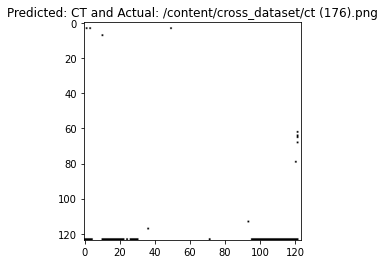

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00239216 0.9976078 ]


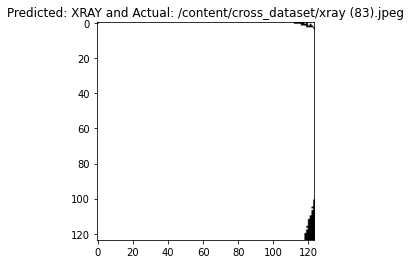

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


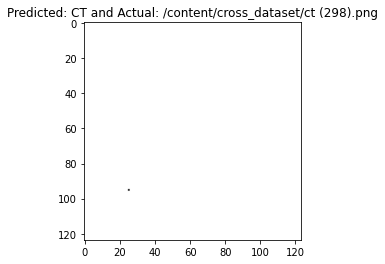

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


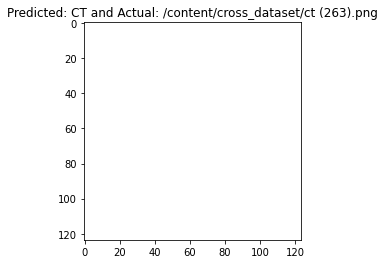

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00108768 0.99891233]


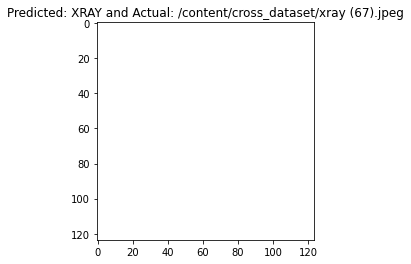

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


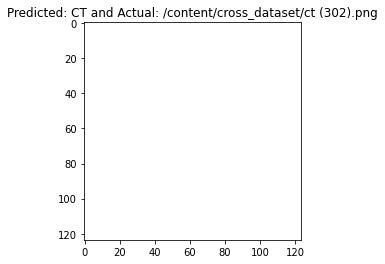

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


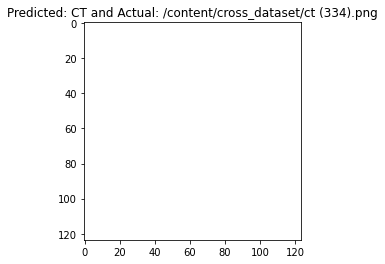

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.9320163  0.06798366]


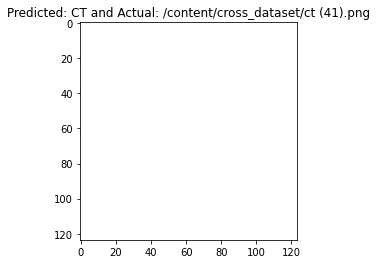

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


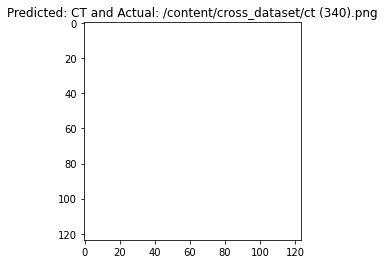

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


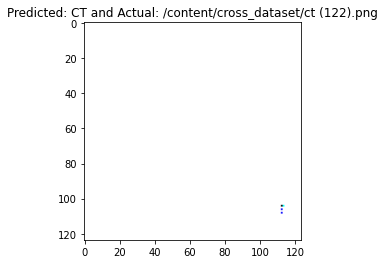

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


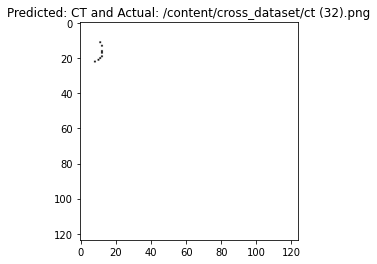

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


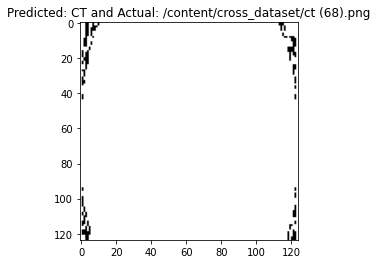

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


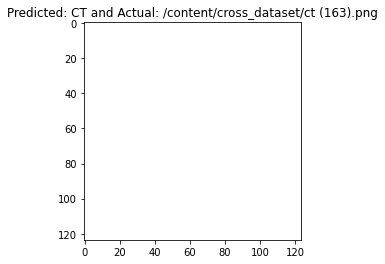

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00721061 0.99278945]


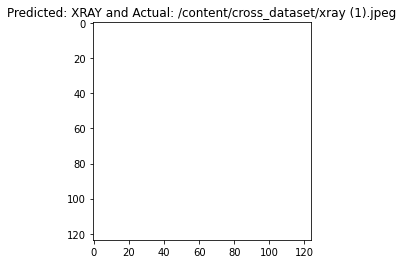

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.0220256e-05 9.9993980e-01]


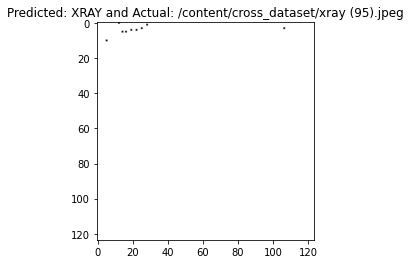

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


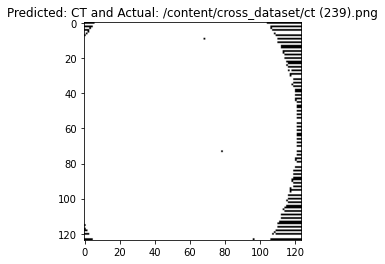

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


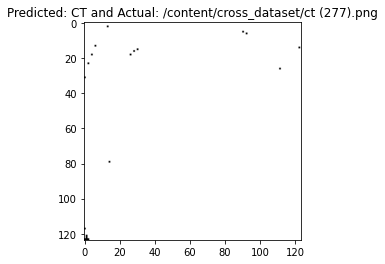

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.0899841e-04 9.9939096e-01]


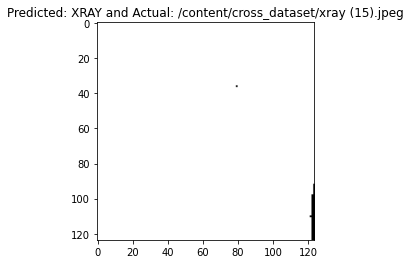

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.927856   0.07214399]


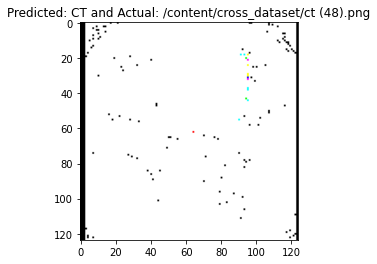

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


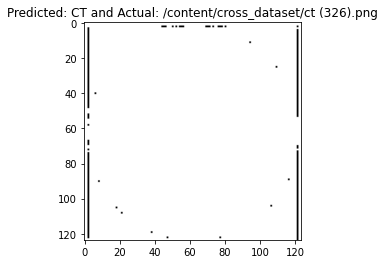

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


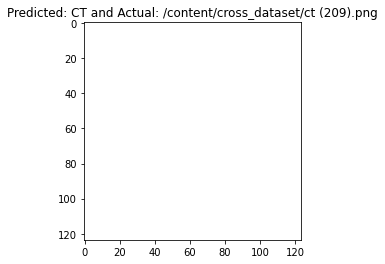

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


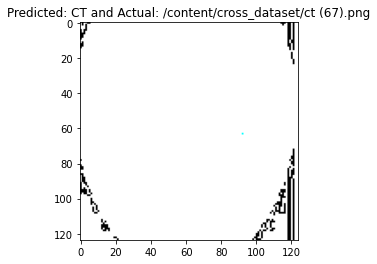

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


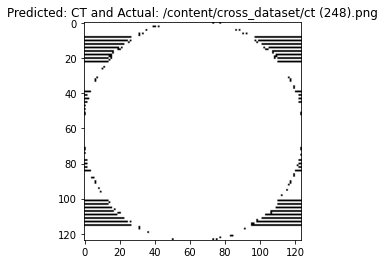

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.5700617e-04 9.9934298e-01]


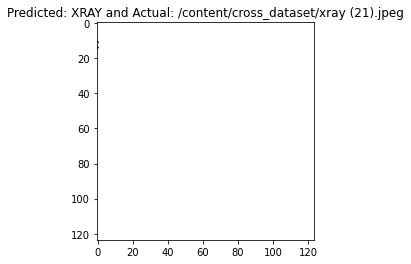

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5.4128520e-04 9.9945873e-01]


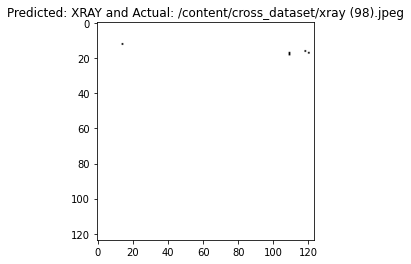

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.4217696e-04 9.9975783e-01]


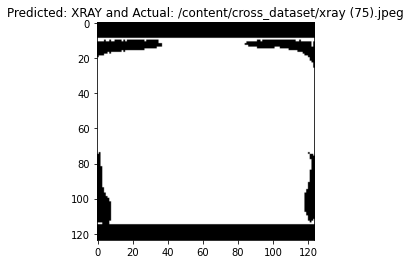

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00113553 0.99886453]


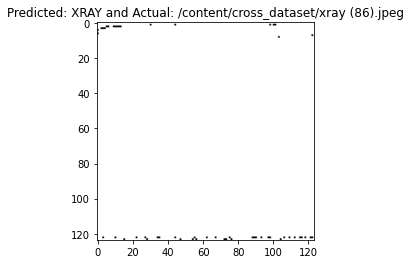

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


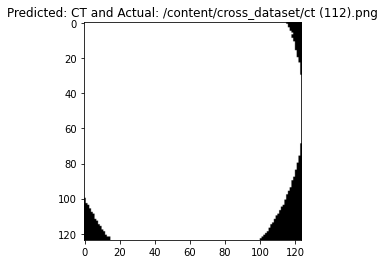

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


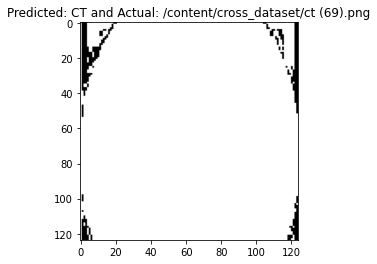

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


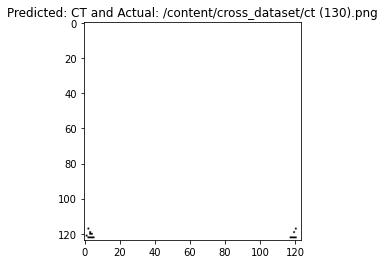

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00189812 0.9981019 ]


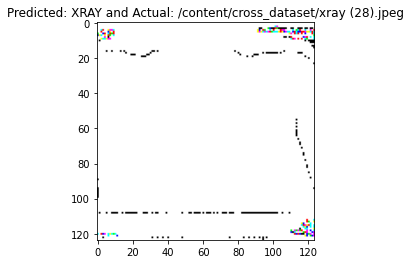

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


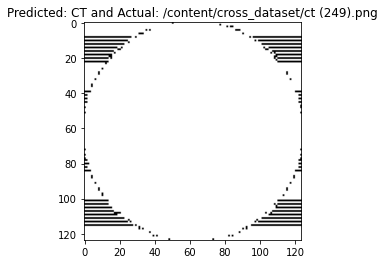

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


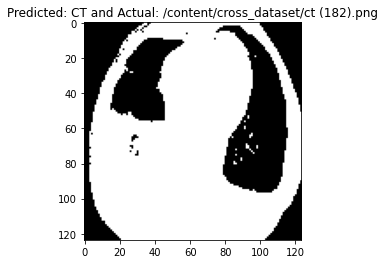

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


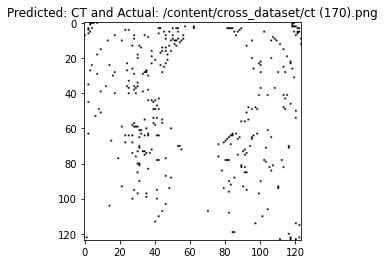

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


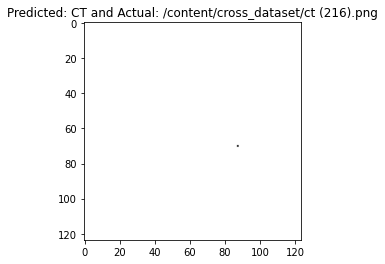

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00122838 0.9987716 ]


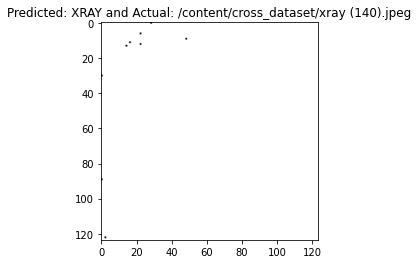

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00111417 0.9988858 ]


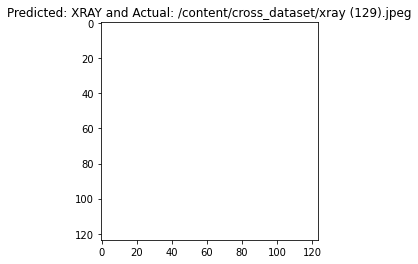

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.07324307 0.9267569 ]


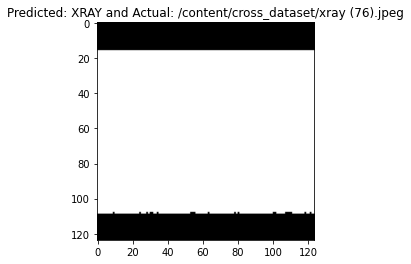

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4.3652637e-04 9.9956352e-01]


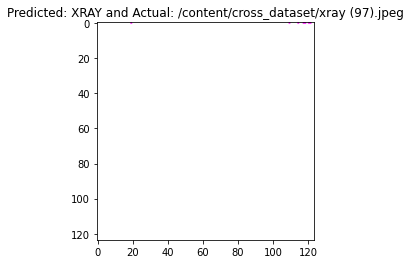

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.01167101 0.98832893]


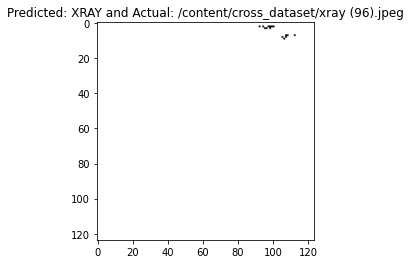

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


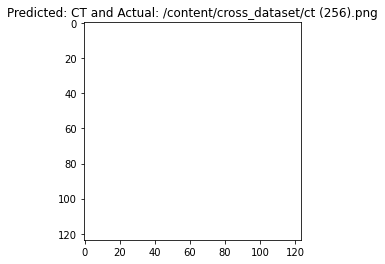

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


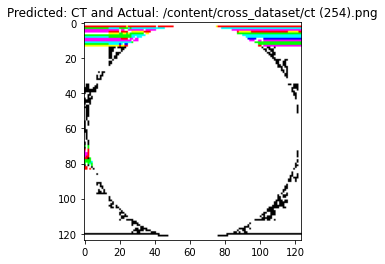

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


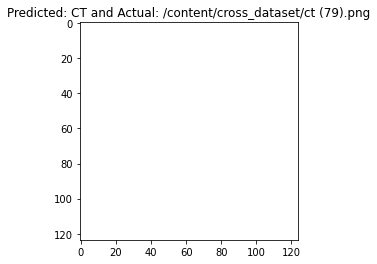

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.9293695  0.07063052]


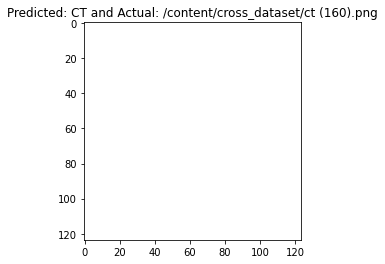

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


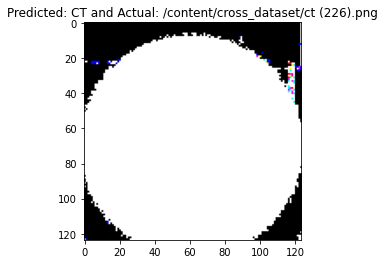

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4.7538802e-04 9.9952459e-01]


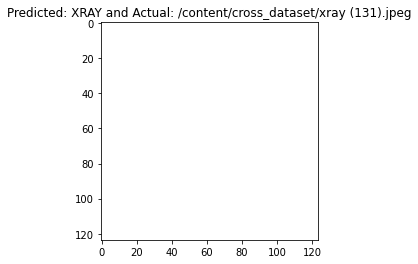

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


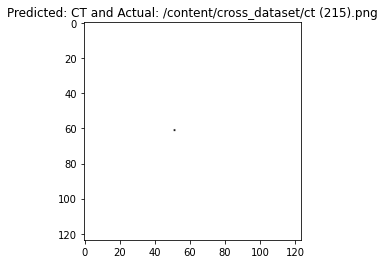

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.3323302e-04 9.9976677e-01]


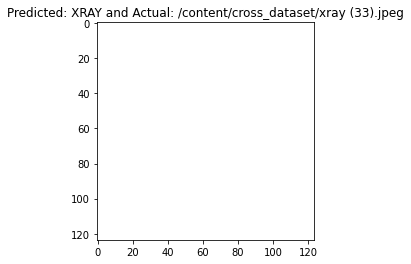

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


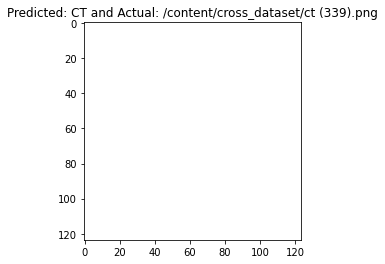

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


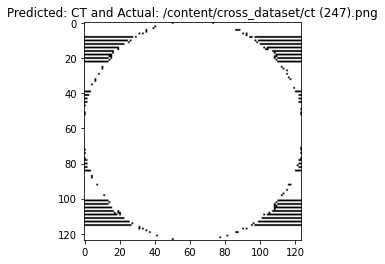

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


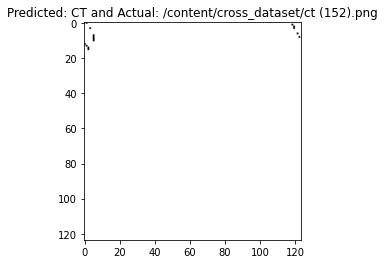

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.9317795  0.06822049]


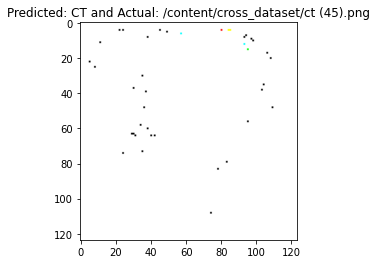

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.9321308  0.06786921]


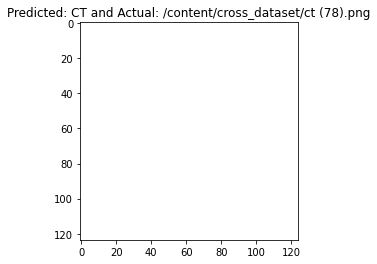

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.3929062e-05 9.9990606e-01]


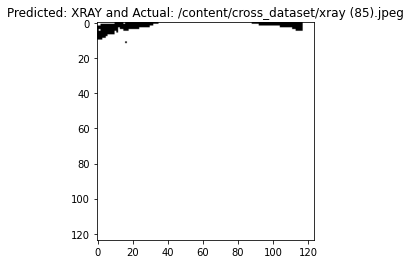

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


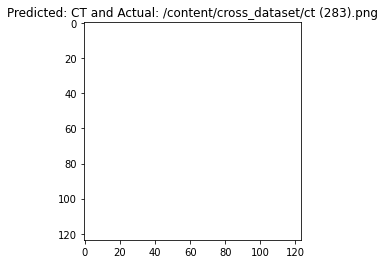

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00138133 0.9986187 ]


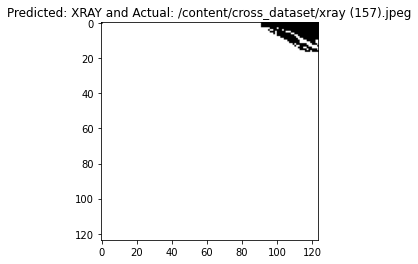

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


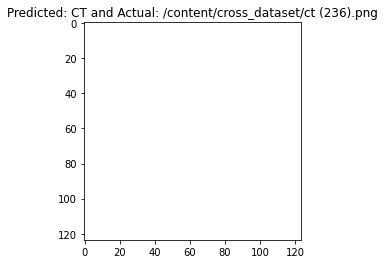

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


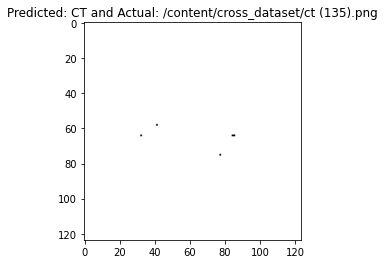

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


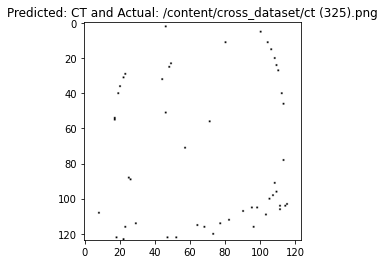

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4.7430169e-04 9.9952567e-01]


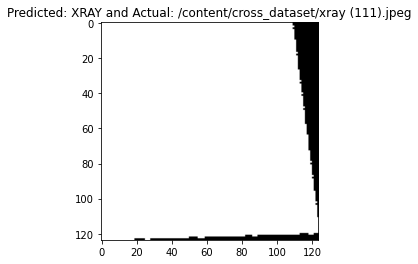

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.2298709e-05 9.9990773e-01]


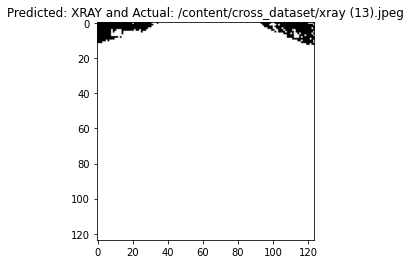

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


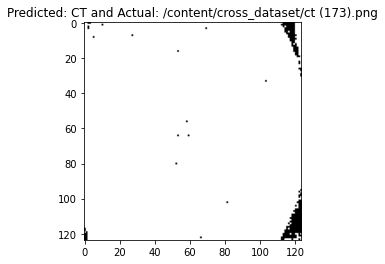

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


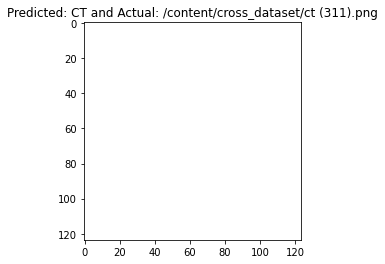

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


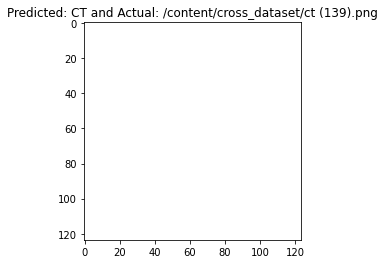

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.5713948e-04 9.9964285e-01]


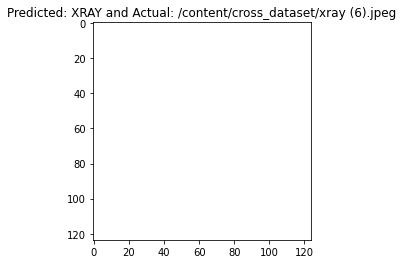

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4.666830e-04 9.995333e-01]


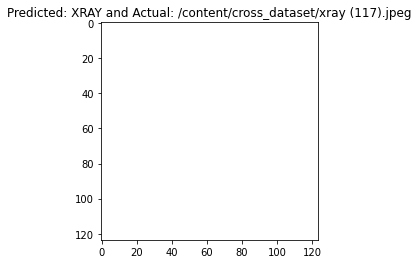

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.6927507e-04 9.9923074e-01]


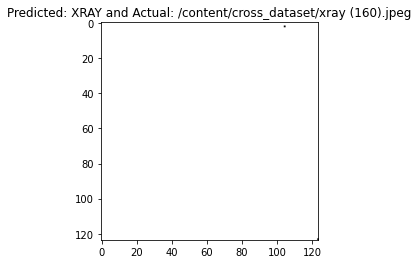

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


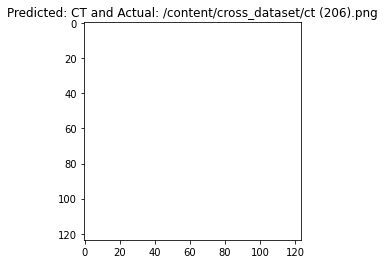

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


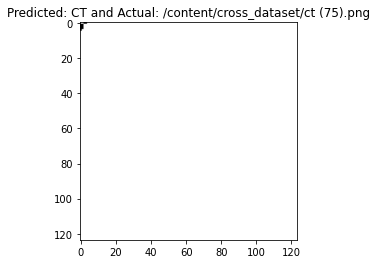

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


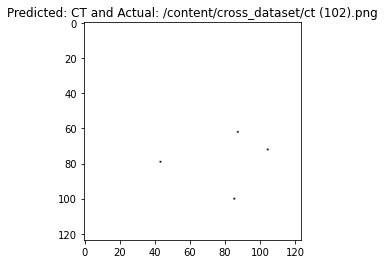

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


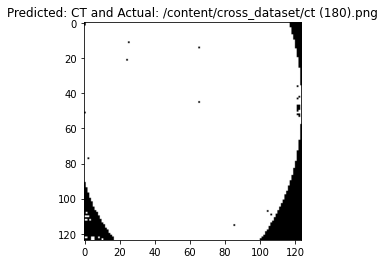

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


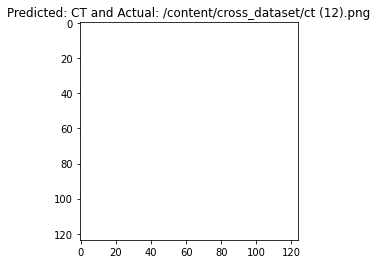

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


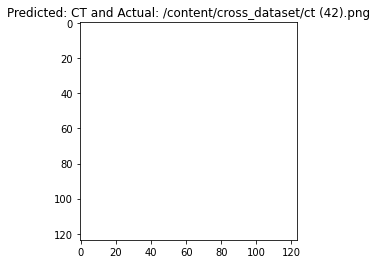

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


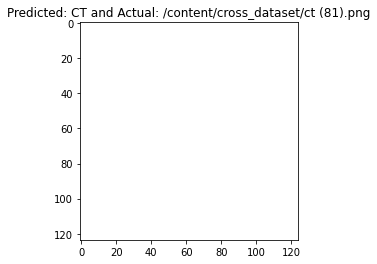

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.9592551e-04 9.9970406e-01]


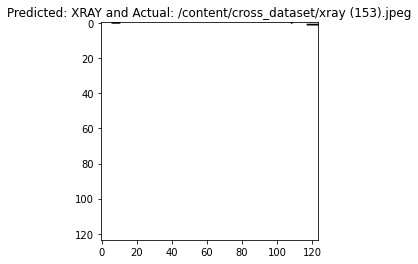

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


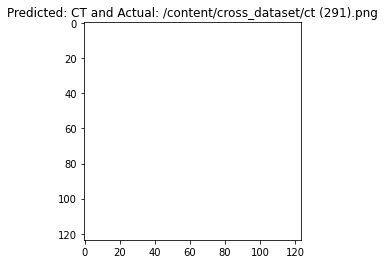

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


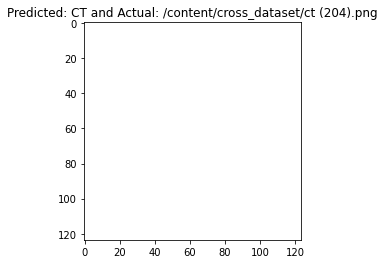

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5.421661e-04 9.994579e-01]


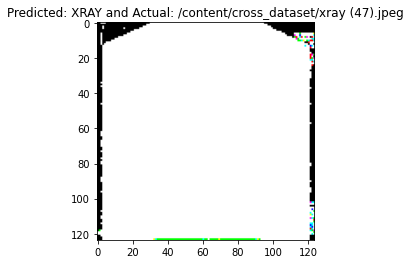

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


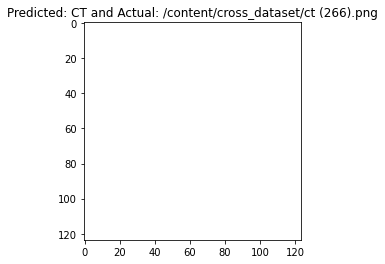

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


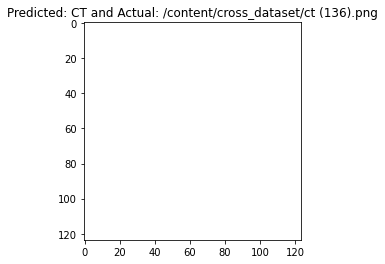

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


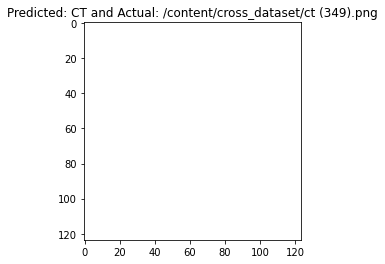

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5.4688375e-05 9.9994528e-01]


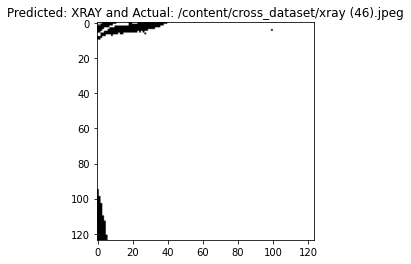

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4.809762e-04 9.995190e-01]


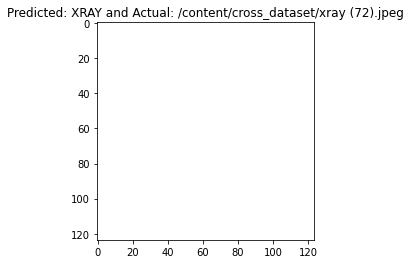

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.8776754e-04 9.9981230e-01]


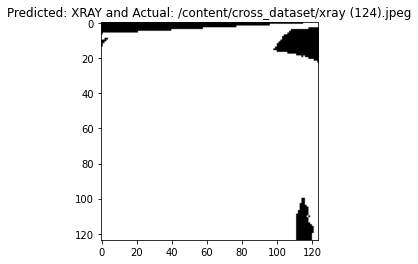

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


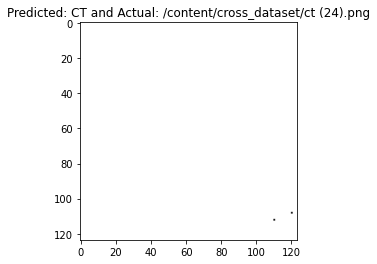

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


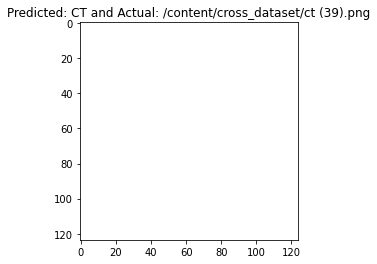

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


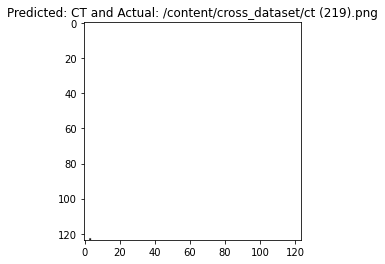

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4.686427e-04 9.995314e-01]


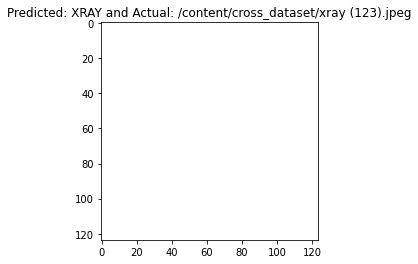

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


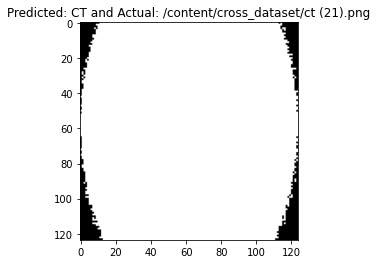

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


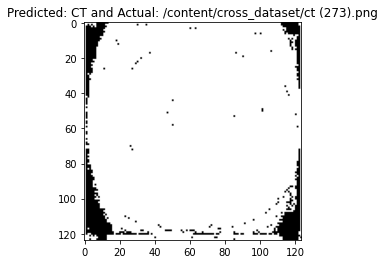

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00778063 0.99221945]


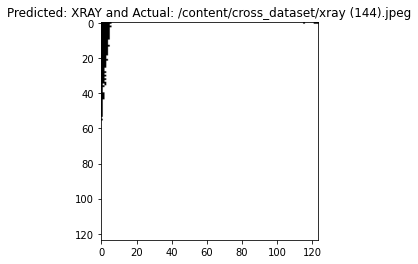

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


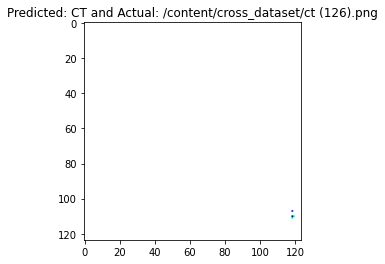

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


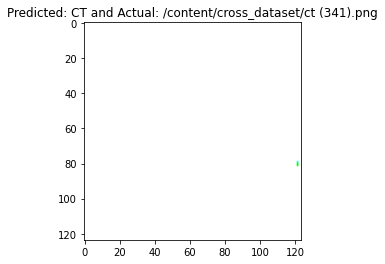

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4.637394e-04 9.995363e-01]


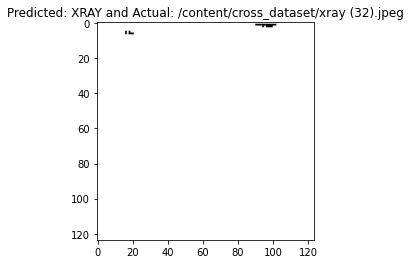

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


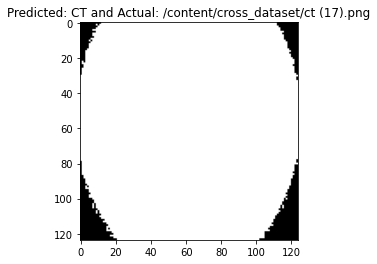

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


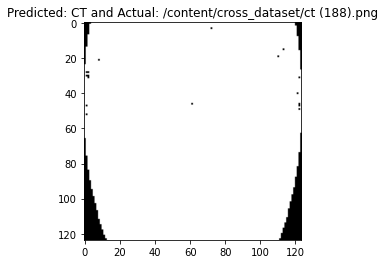

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.1951206e-04 9.9928051e-01]


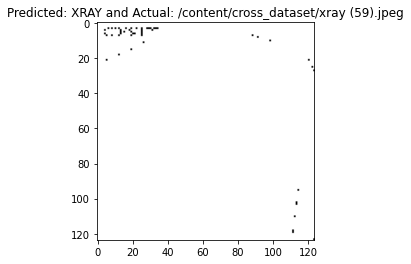

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.0182336e-04 9.9989820e-01]


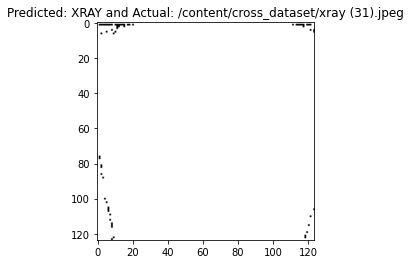

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00123682 0.9987632 ]


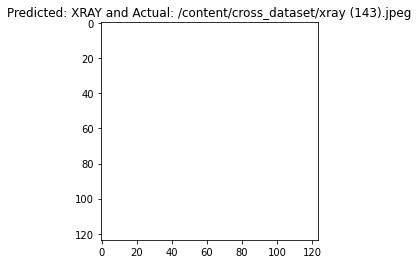

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


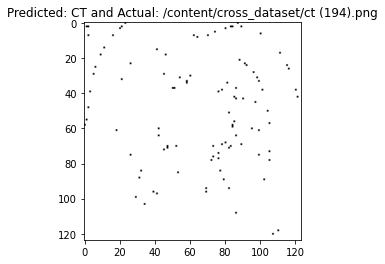

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


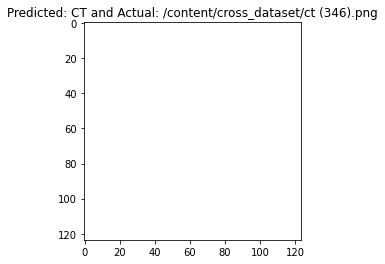

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00218318 0.9978168 ]


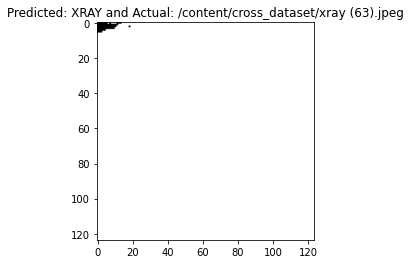

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


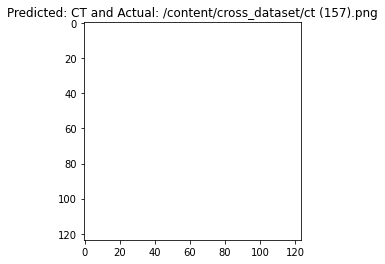

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


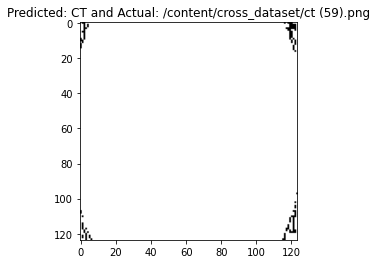

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00102683 0.99897313]


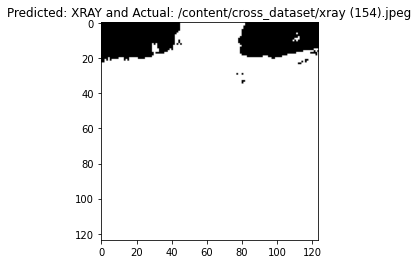

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


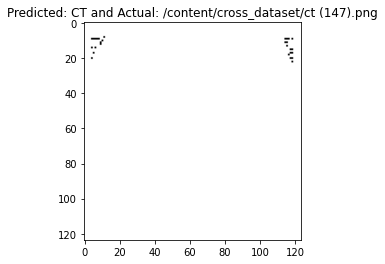

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


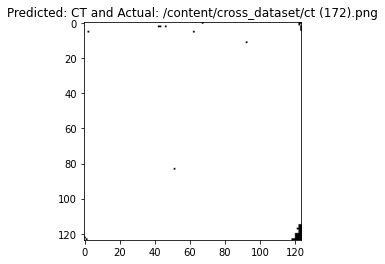

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


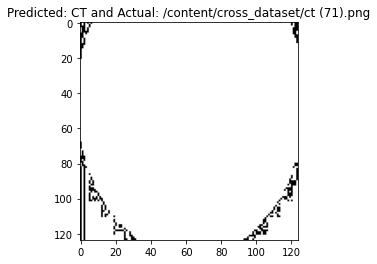

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.1447093e-04 9.9968553e-01]


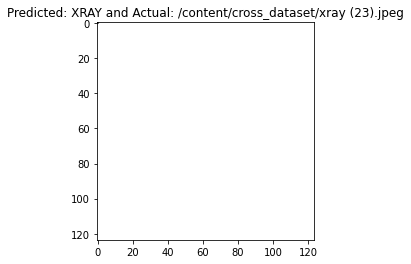

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


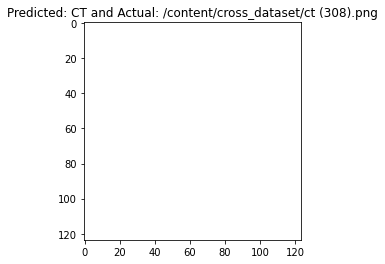

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.01916013 0.9808398 ]


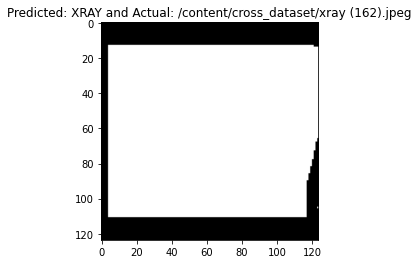

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


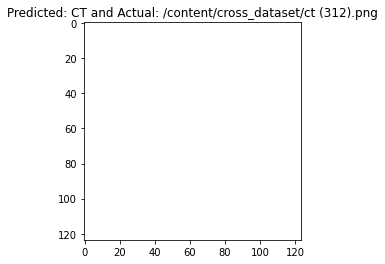

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


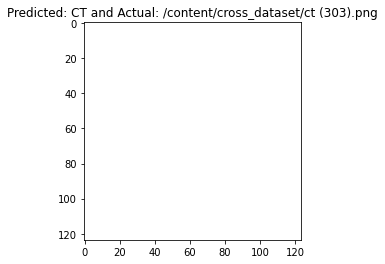

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


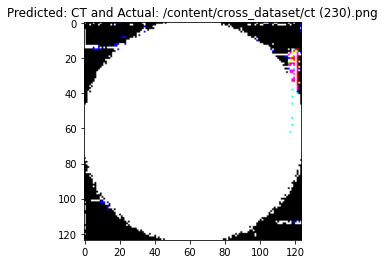

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


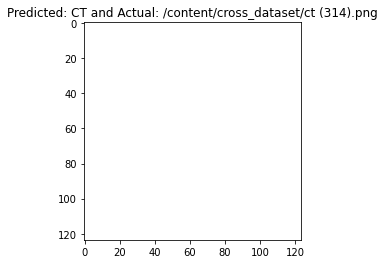

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


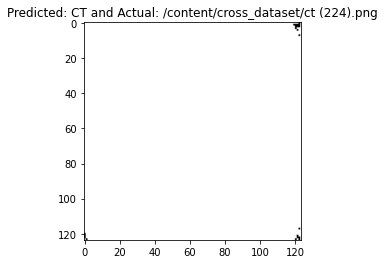

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


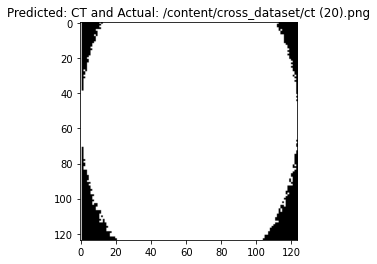

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


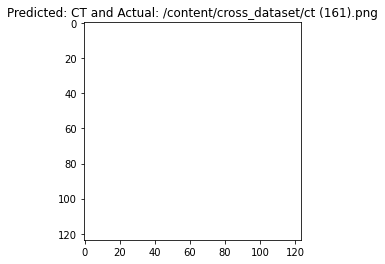

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


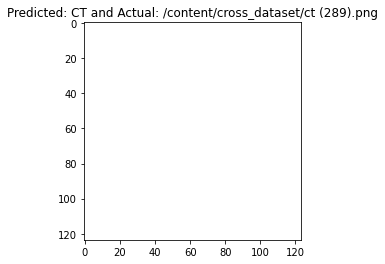

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.01011654 0.9898835 ]


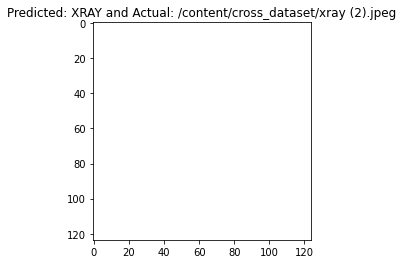

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5.7013094e-04 9.9942988e-01]


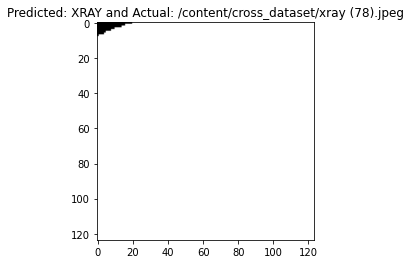

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


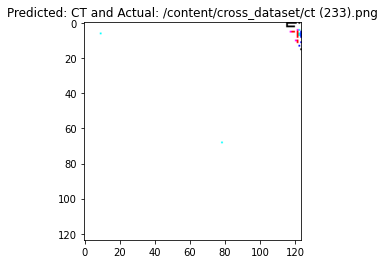

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.924652e-04 9.990075e-01]


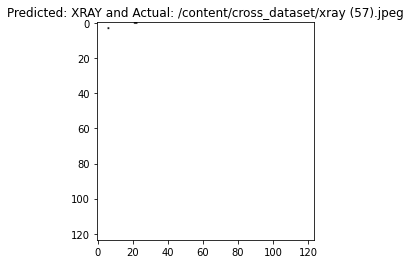

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


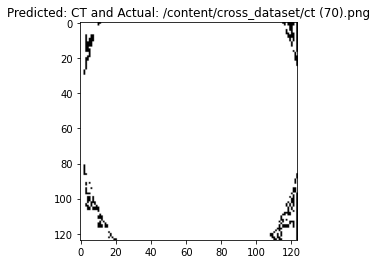

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.01735831 0.9826417 ]


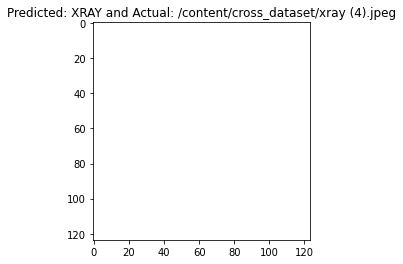

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5.419522e-04 9.994580e-01]


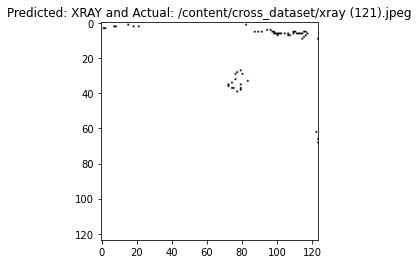

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


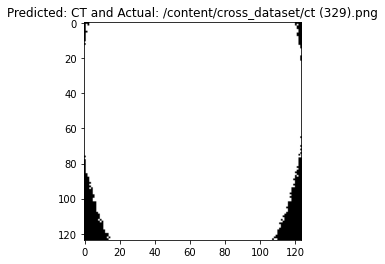

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.6157473e-04 9.9903846e-01]


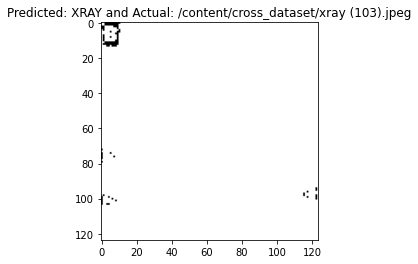

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


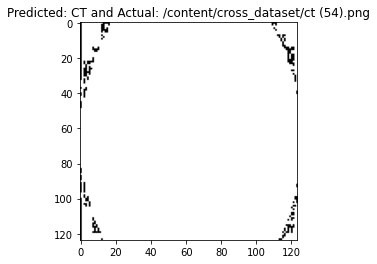

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


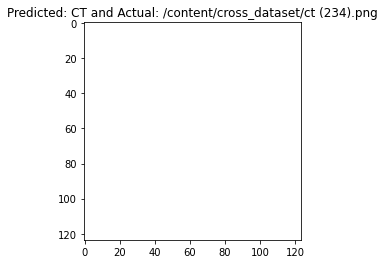

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.93035126 0.06964871]


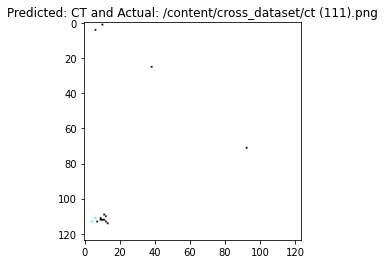

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.93348664 0.06651331]


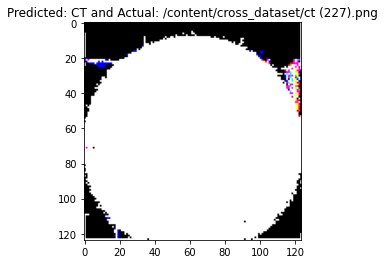

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.4265493e-04 9.9975735e-01]


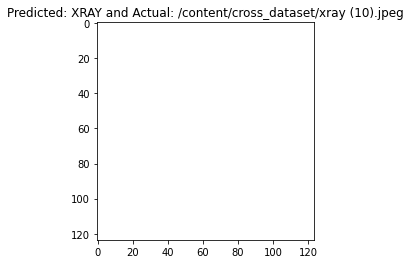

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


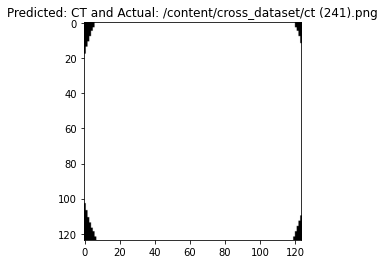

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


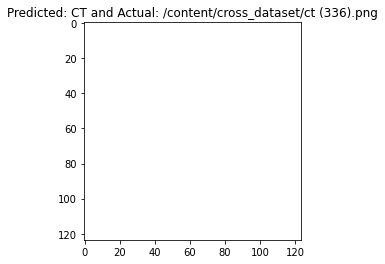

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


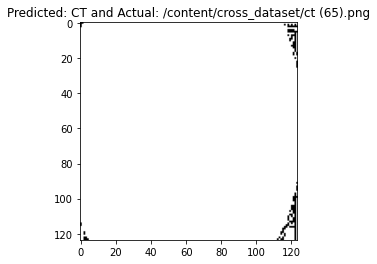

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


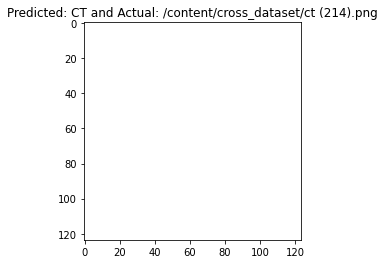

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


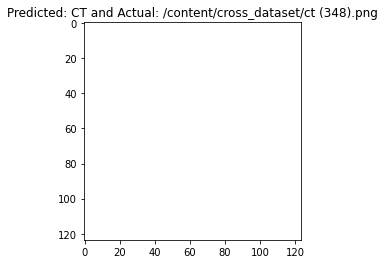

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


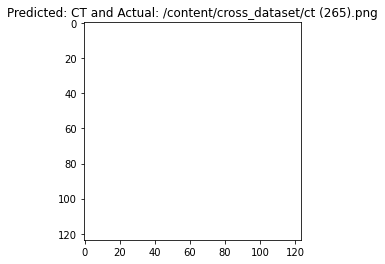

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


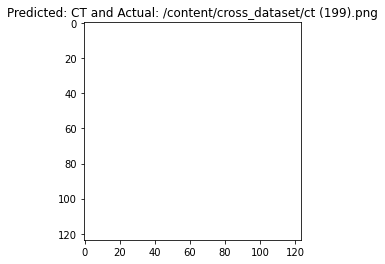

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


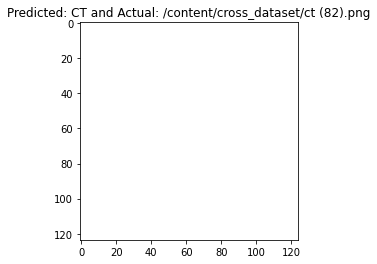

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


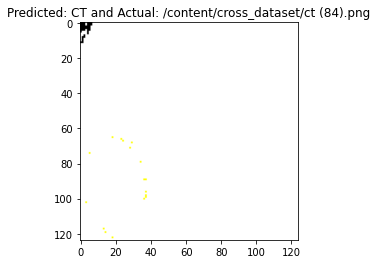

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


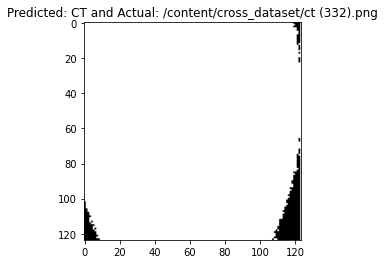

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


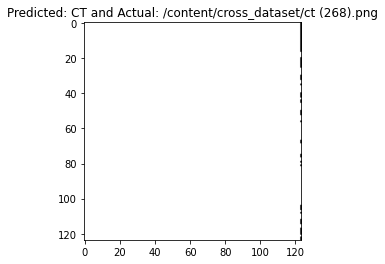

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00197112 0.9980288 ]


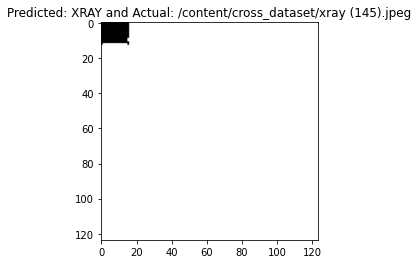

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00107292 0.99892706]


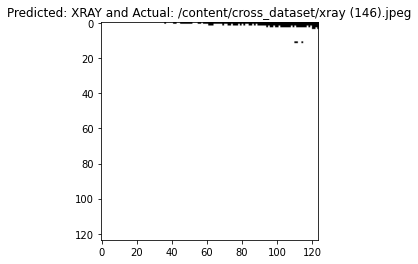

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8.373437e-04 9.991627e-01]


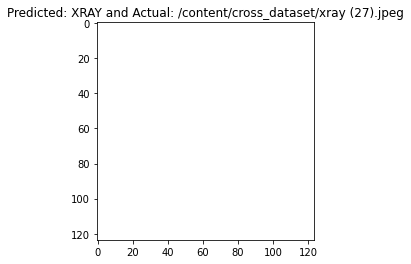

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


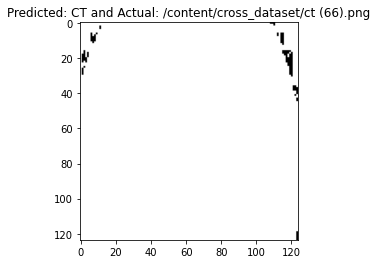

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


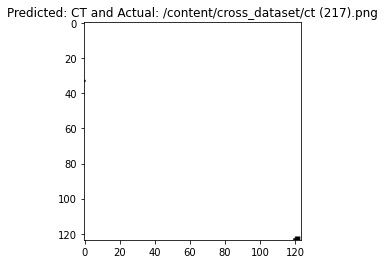

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.013552   0.98644805]


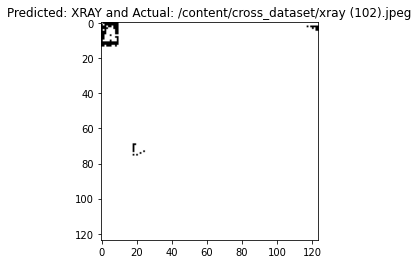

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


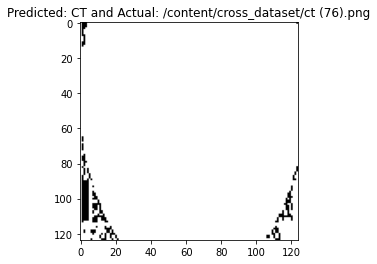

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


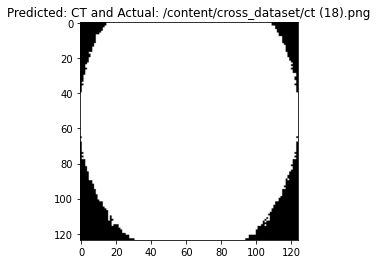

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


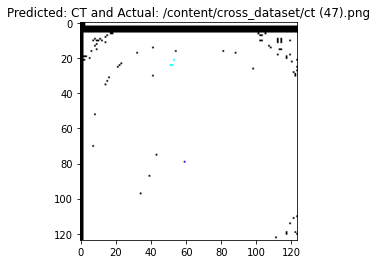

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


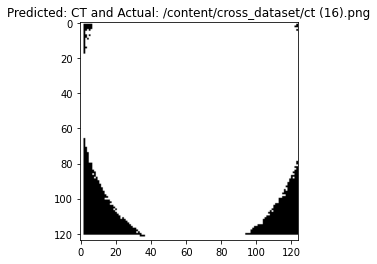

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


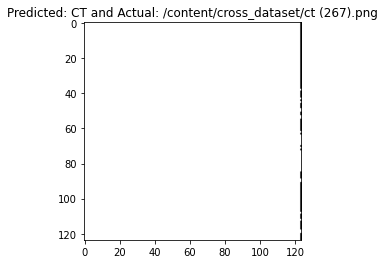

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


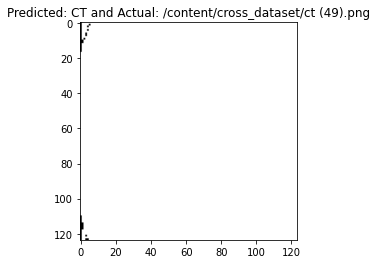

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00547943 0.99452055]


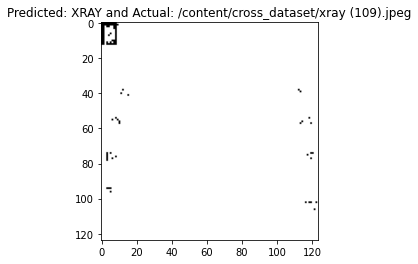

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.9268539  0.07314607]


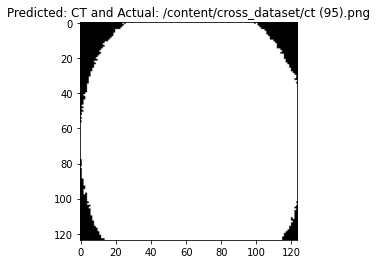

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


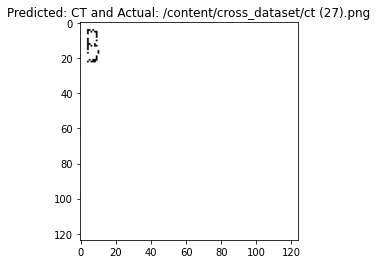

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.991219e-06 9.999900e-01]


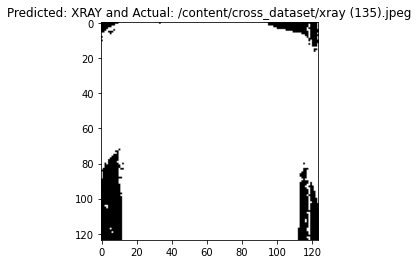

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


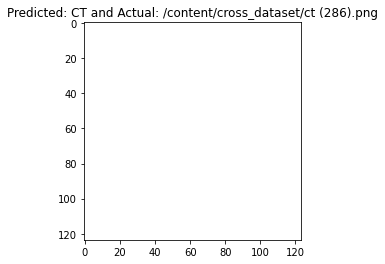

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.4891969e-04 9.9985111e-01]


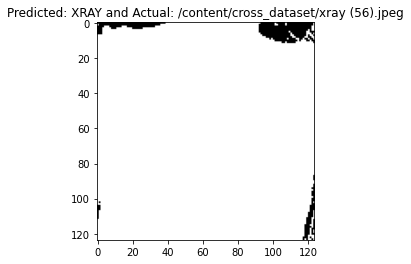

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


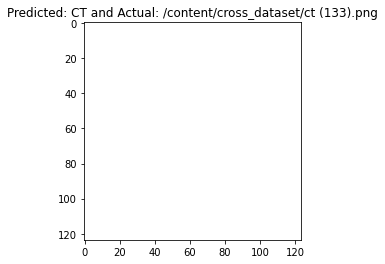

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00475668 0.99524325]


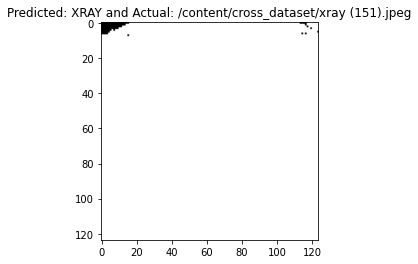

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00689097 0.993109  ]


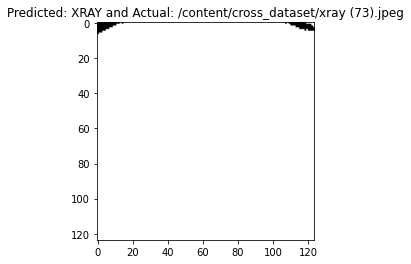

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00152169 0.99847835]


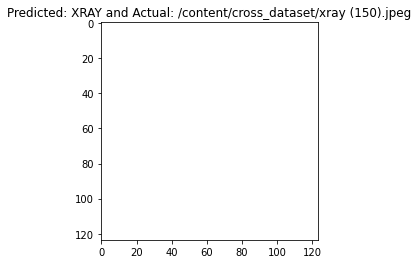

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.199798e-04 9.997800e-01]


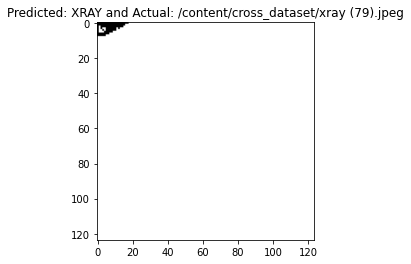

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.3079700e-04 9.9976915e-01]


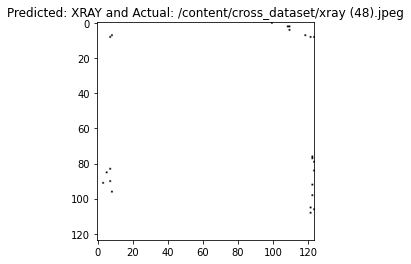

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.8580192  0.14198083]


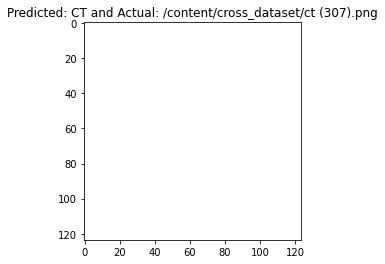

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.2364493e-05 9.9997759e-01]


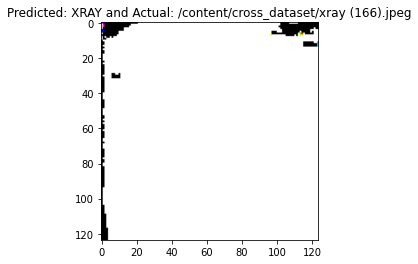

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


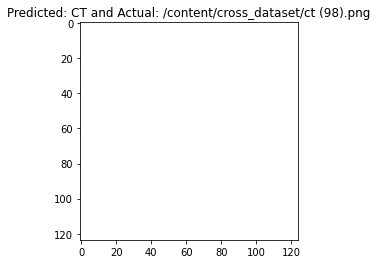

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


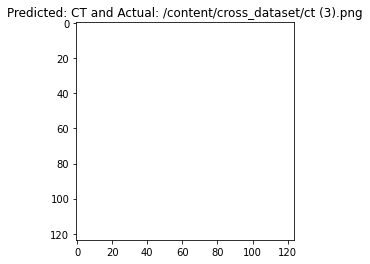

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


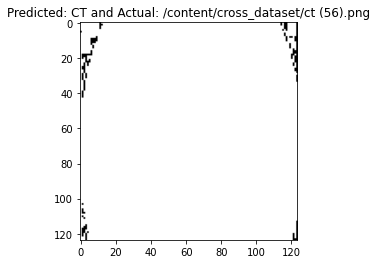

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


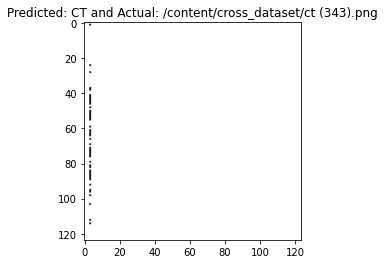

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.01710881 0.9828912 ]


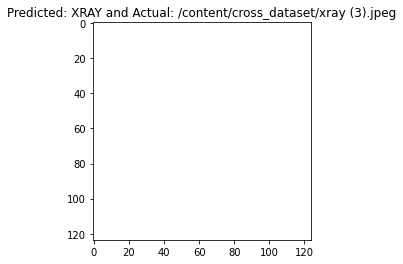

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


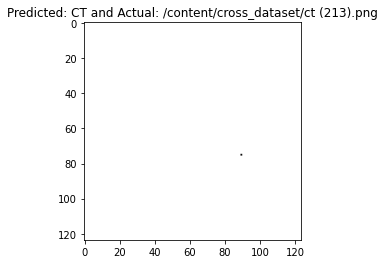

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.2573876e-04 9.9987423e-01]


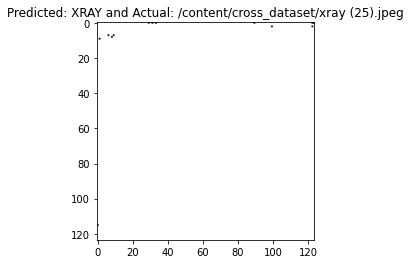

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


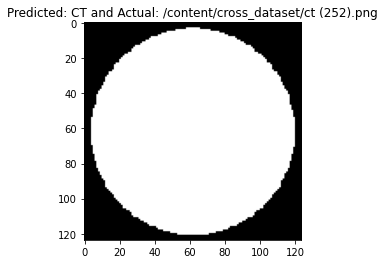

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.4255392e-04 9.9965739e-01]


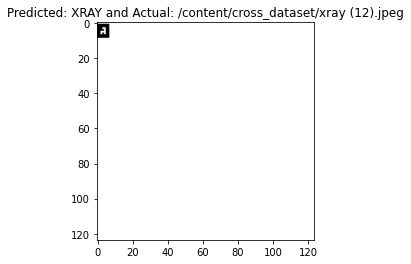

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


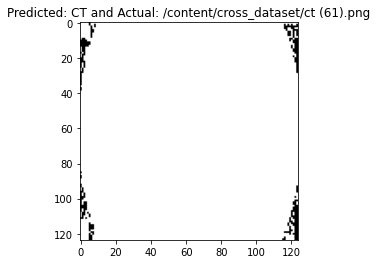

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


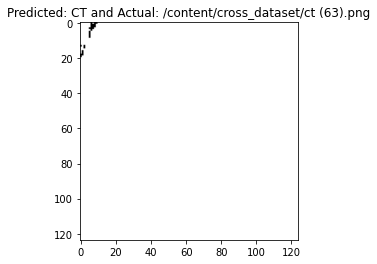

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5.446284e-04 9.994554e-01]


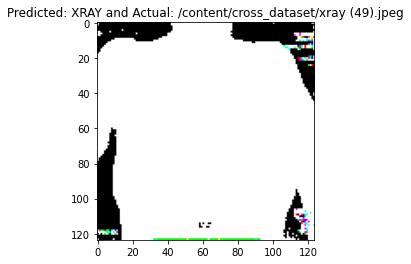

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.2310719e-04 9.9927694e-01]


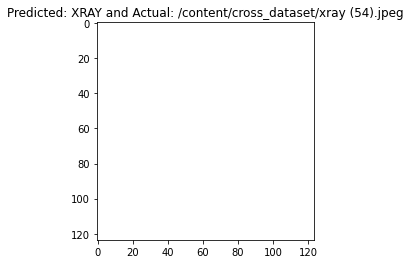

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


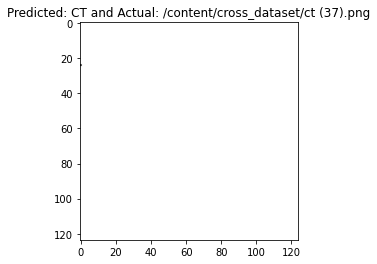

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


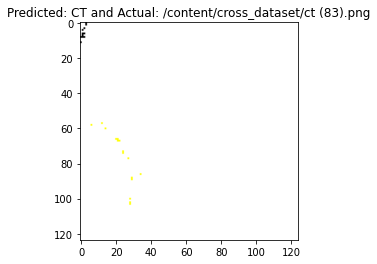

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


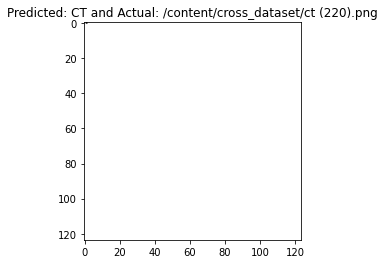

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.04190831 0.9580917 ]


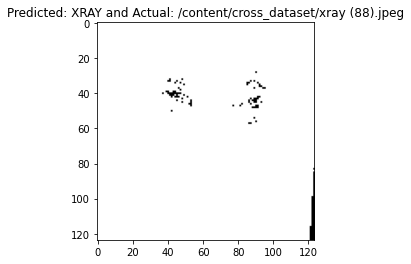

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00127367 0.9987263 ]


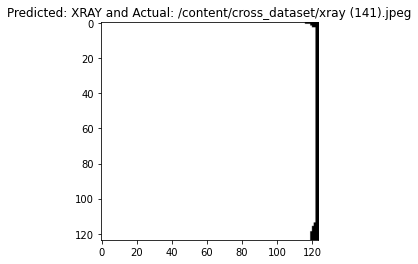

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


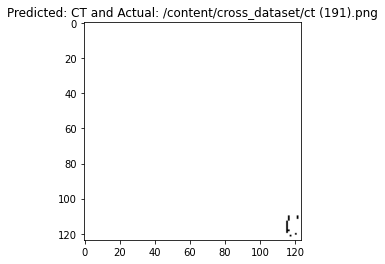

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


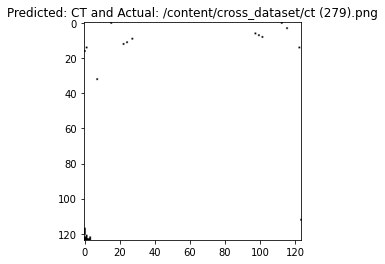

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


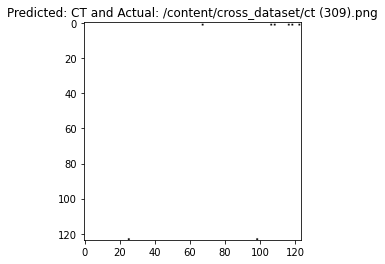

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


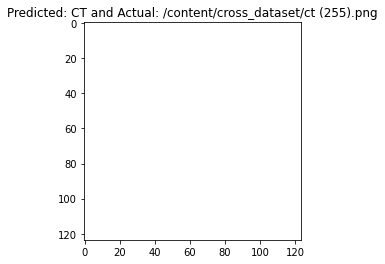

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.197732e-04 9.996803e-01]


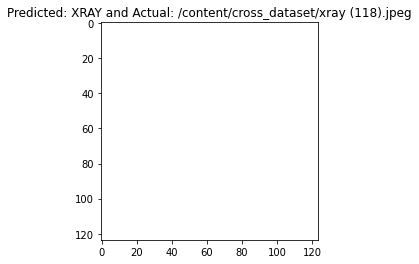

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


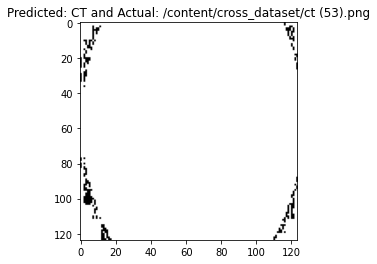

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


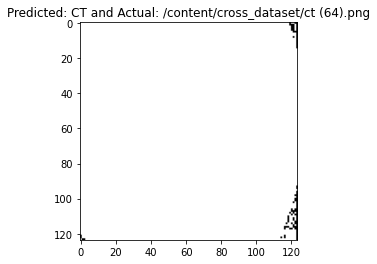

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5.1167644e-05 9.9994886e-01]


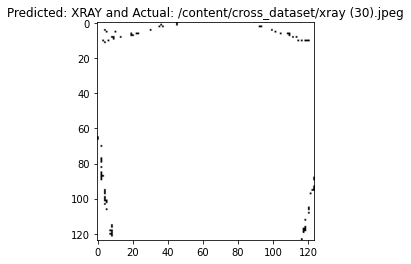

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


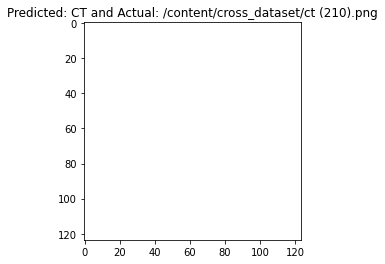

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


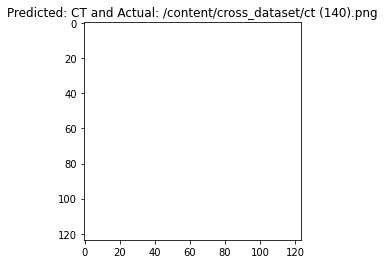

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


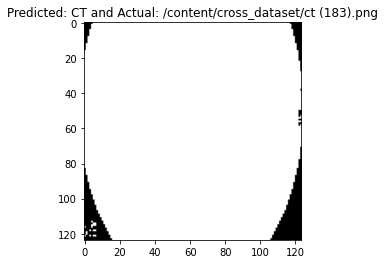

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00172142 0.9982786 ]


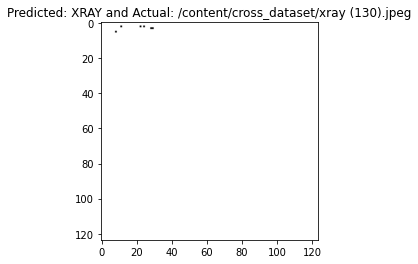

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


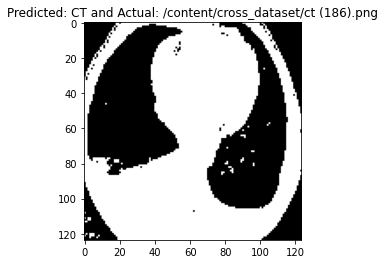

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


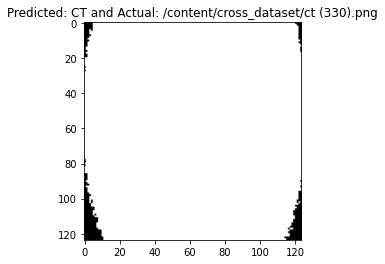

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


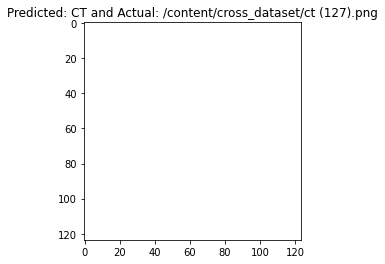

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


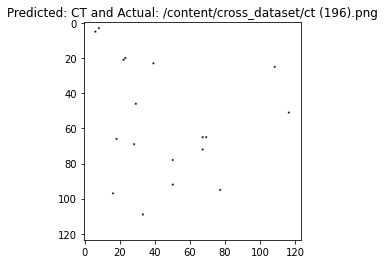

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


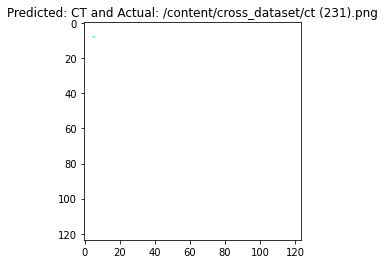

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.031886e-04 9.992968e-01]


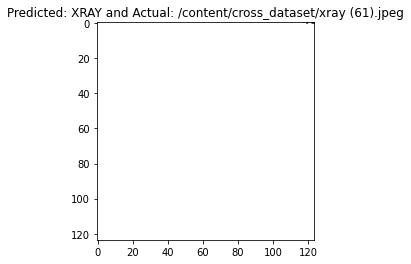

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


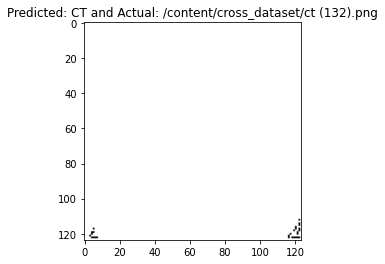

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


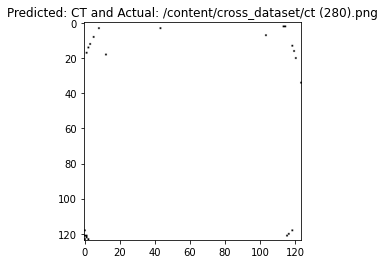

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.4239364e-05 9.9993575e-01]


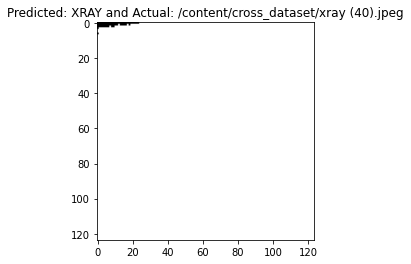

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.5067673e-05 9.9997497e-01]


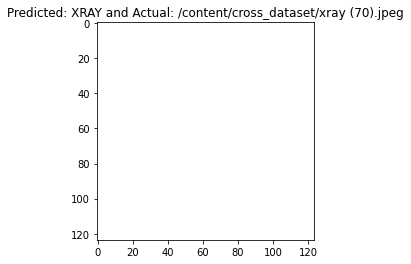

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


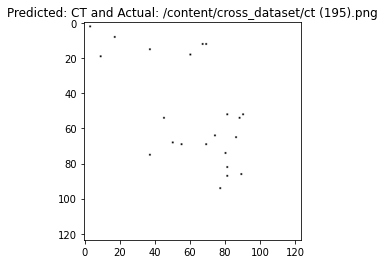

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


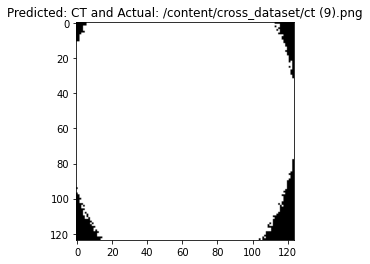

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


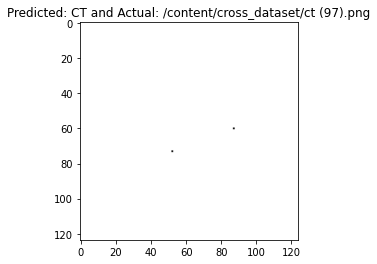

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


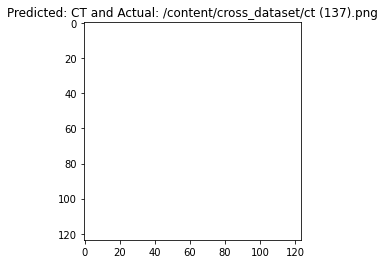

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.9690606e-05 9.9997032e-01]


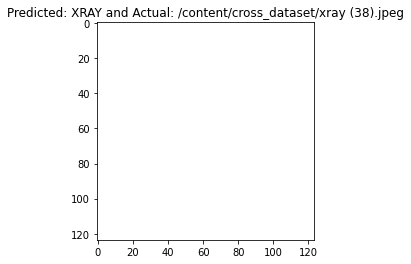

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


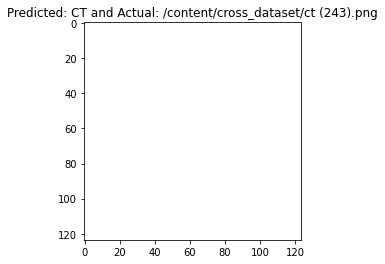

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


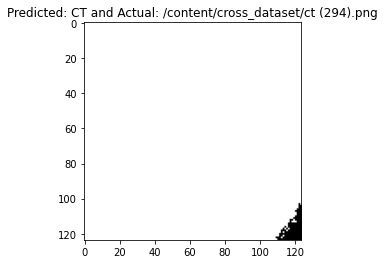

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


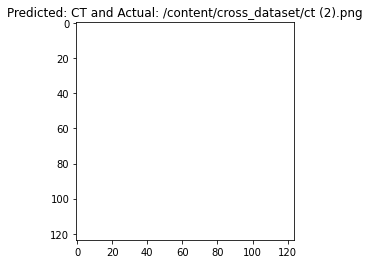

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


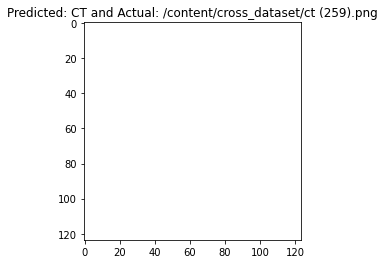

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


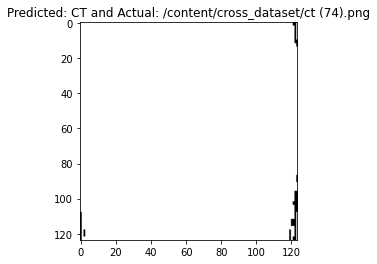

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


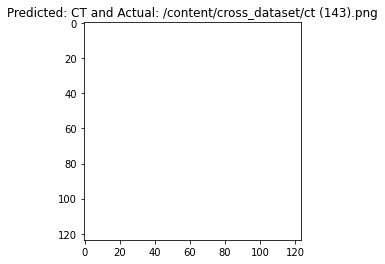

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


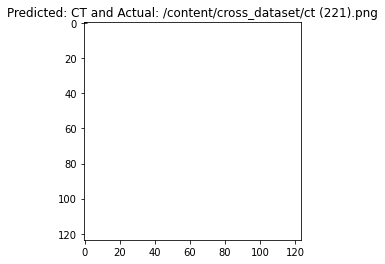

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


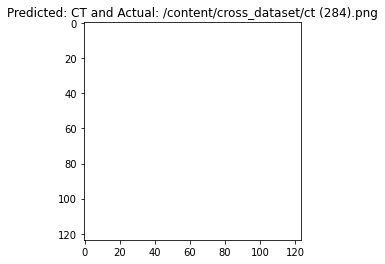

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00514886 0.9948512 ]


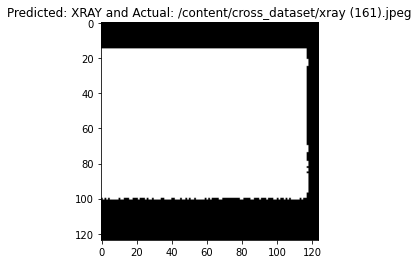

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.027563e-04 9.996973e-01]


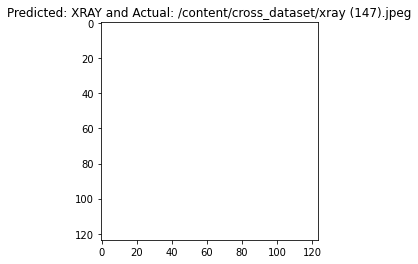

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00115229 0.9988477 ]


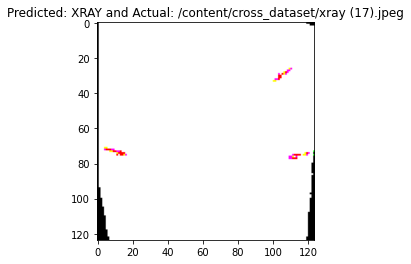

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.02007741 0.9799226 ]


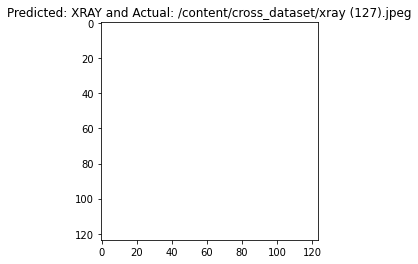

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00102171 0.99897826]


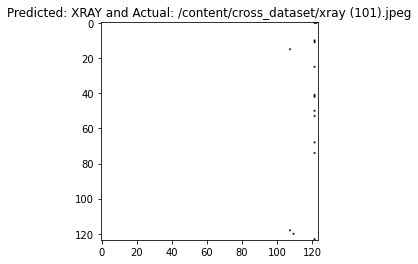

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


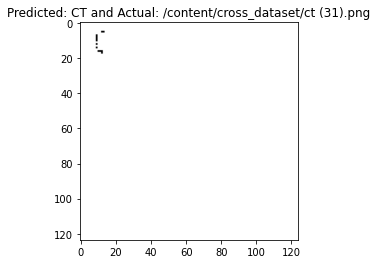

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.9432201e-04 9.9900573e-01]


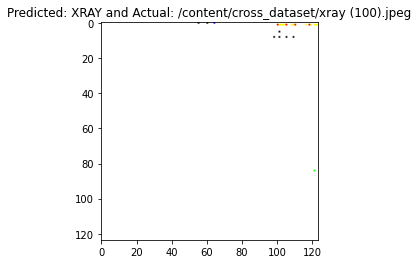

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


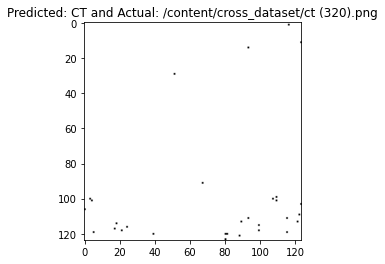

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


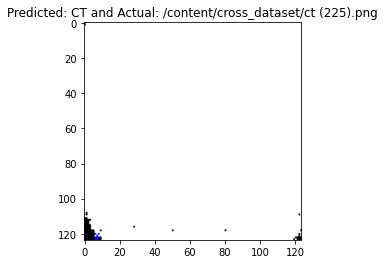

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.5694971e-04 9.9984300e-01]


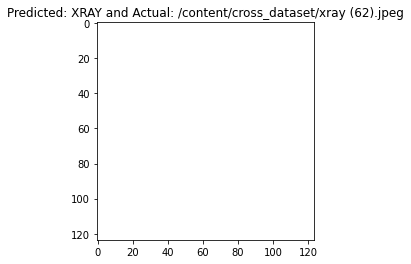

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.0036548 0.9963452]


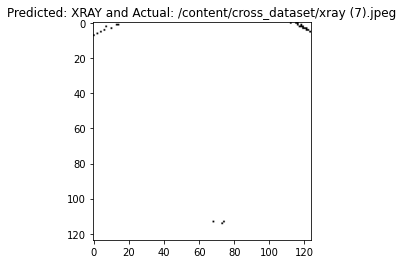

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00154904 0.998451  ]


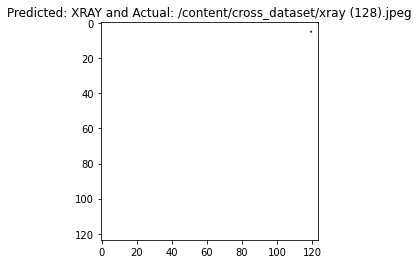

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


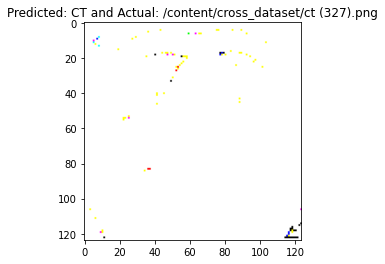

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.9471973e-04 9.9980527e-01]


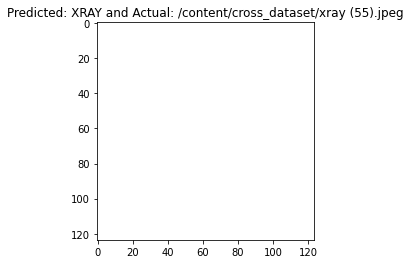

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


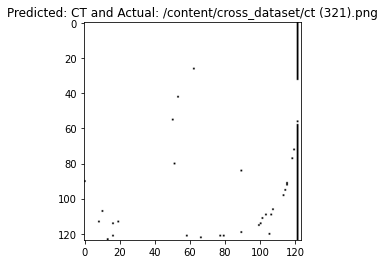

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


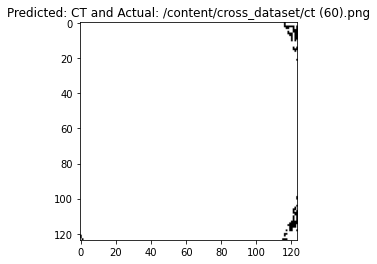

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


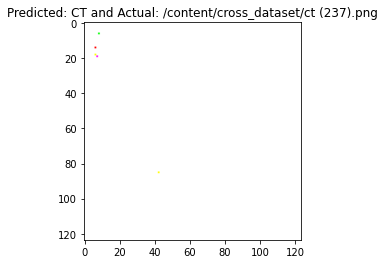

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


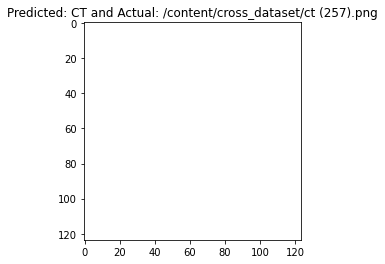

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00197218 0.99802774]


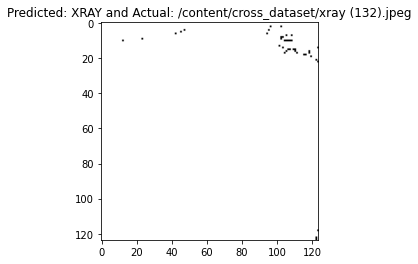

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8.889011e-04 9.991111e-01]


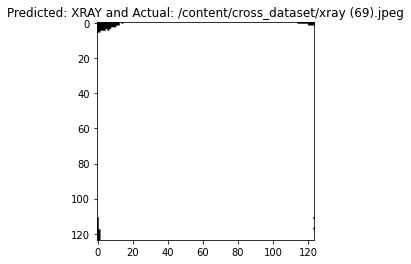

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.8049505e-04 9.9931955e-01]


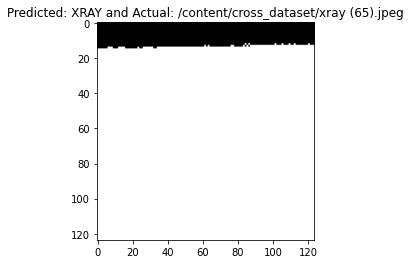

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


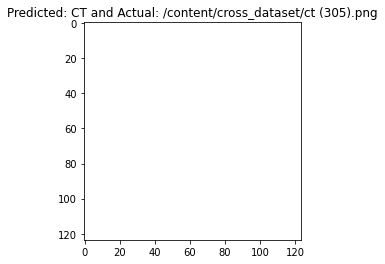

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


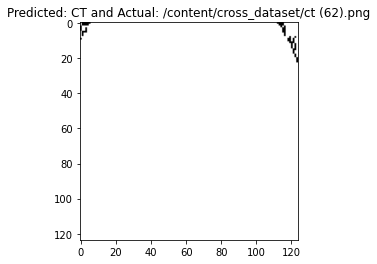

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.7773847e-04 9.9972230e-01]


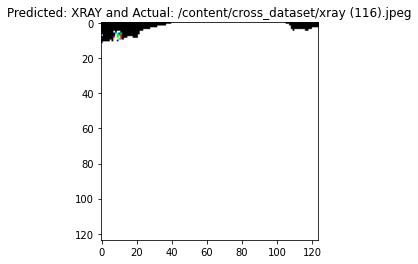

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.0227270e-04 9.9979776e-01]


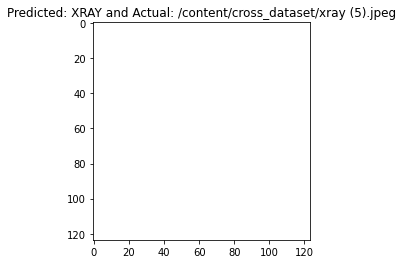

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.8702637e-04 9.9921298e-01]


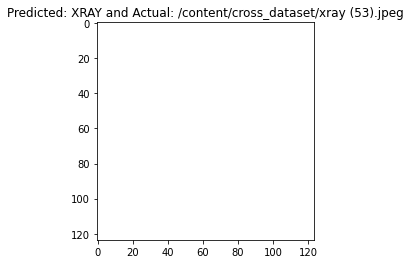

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


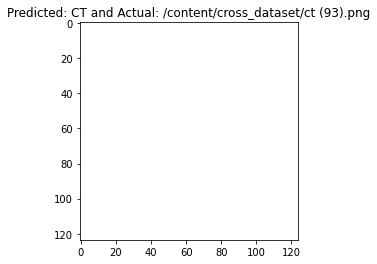

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00146654 0.9985335 ]


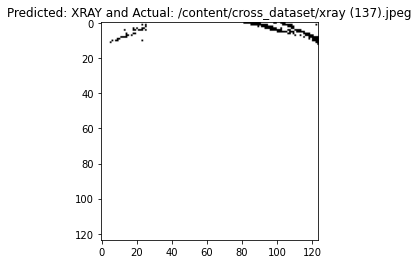

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


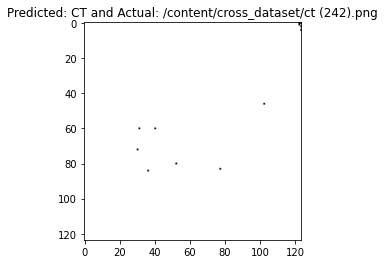

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


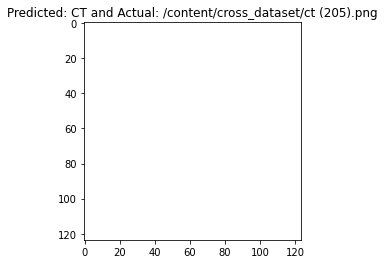

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


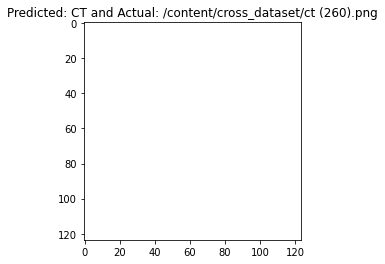

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


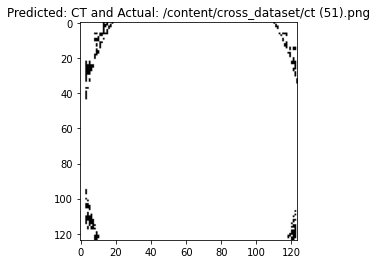

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


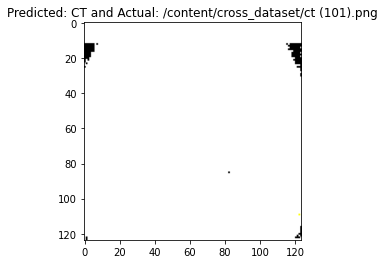

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00158529 0.99841464]


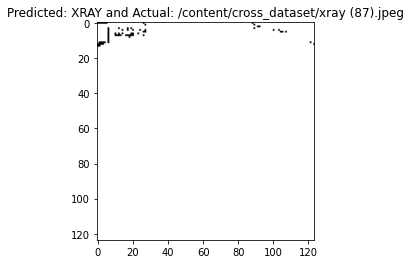

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


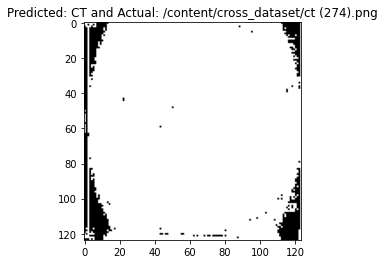

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


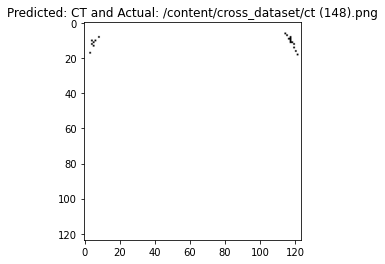

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.5516953e-04 9.9964488e-01]


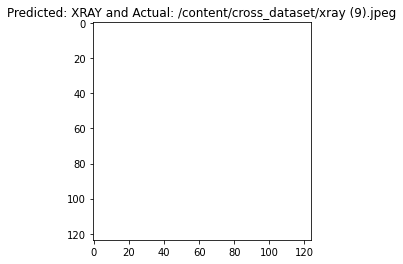

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


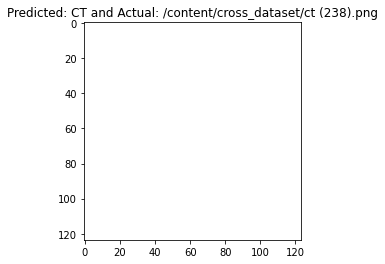

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


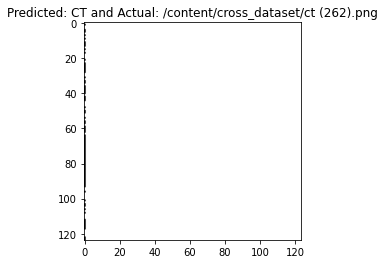

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5.5269327e-04 9.9944729e-01]


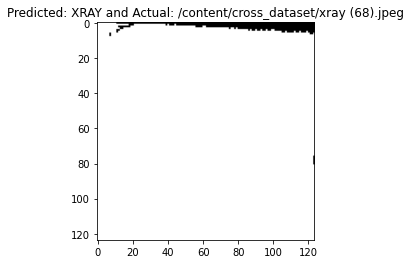

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


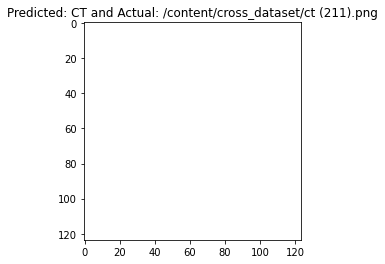

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.28169304 0.71830696]


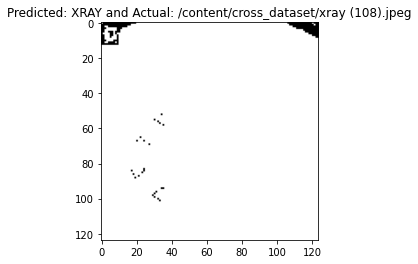

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


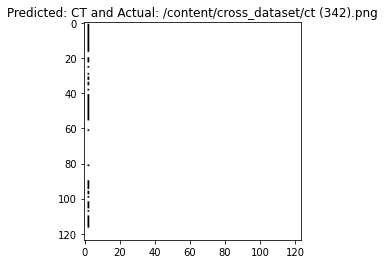

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


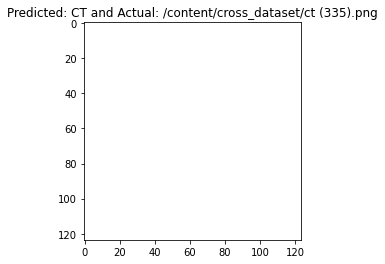

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00180062 0.99819934]


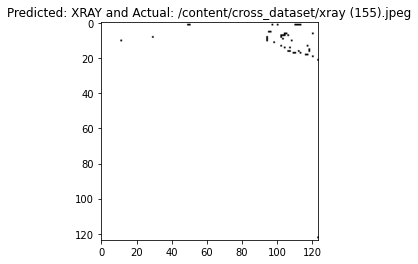

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


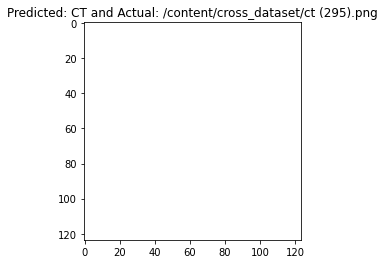

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


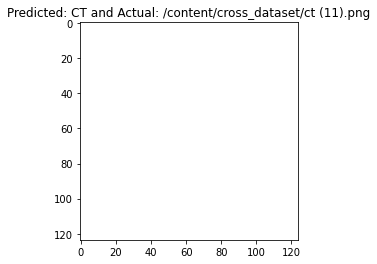

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


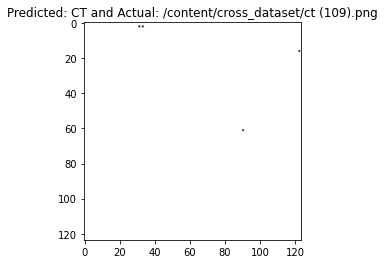

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


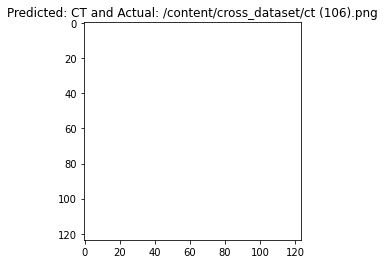

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


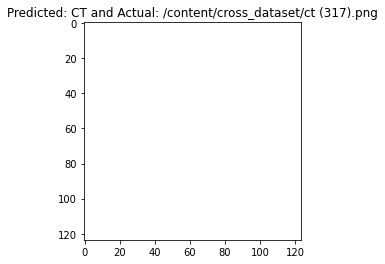

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


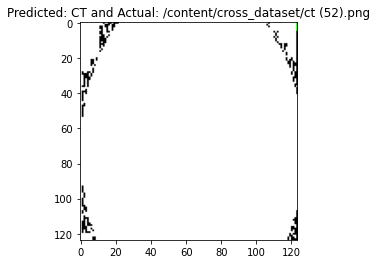

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.1997987e-04 9.9928004e-01]


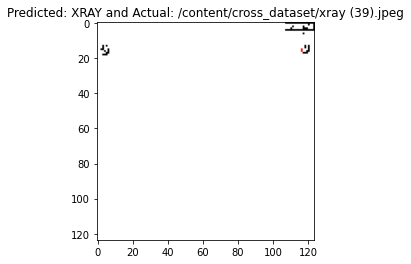

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


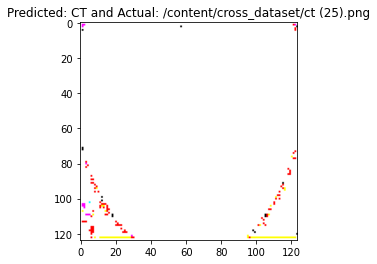

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8.119332e-04 9.991880e-01]


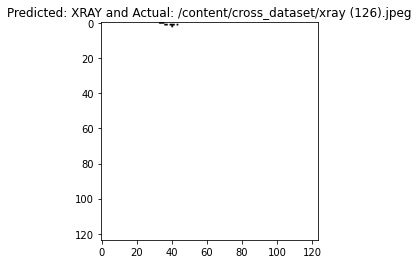

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


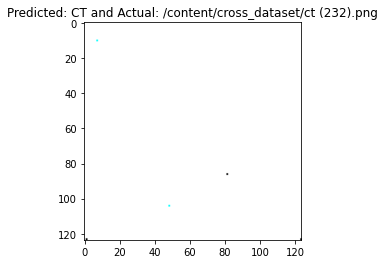

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.4413923e-04 9.9975592e-01]


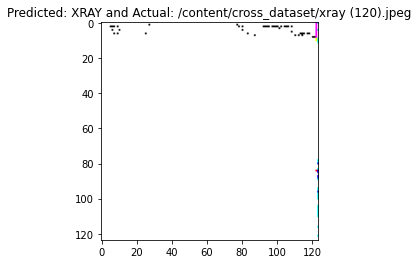

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.0563725e-04 9.9969435e-01]


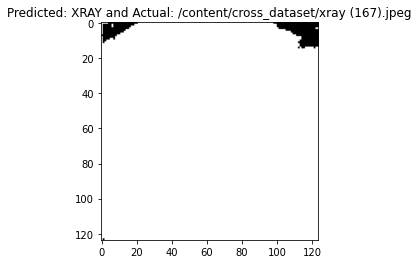

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.02419018 0.9758099 ]


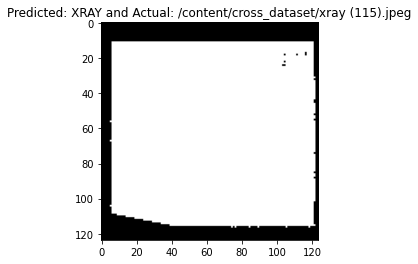

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


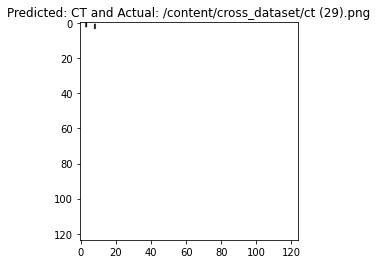

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


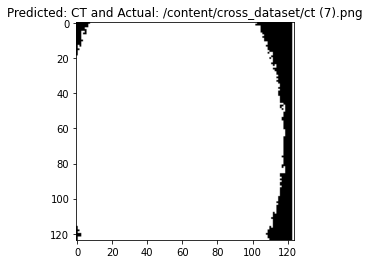

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00361033 0.9963897 ]


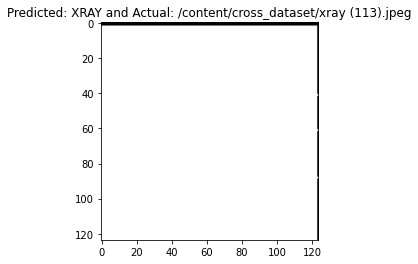

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


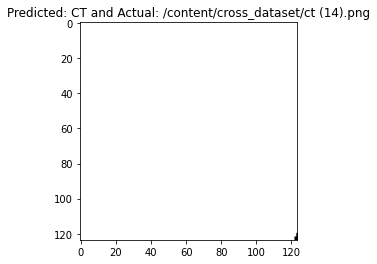

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.7549544e-04 9.9902451e-01]


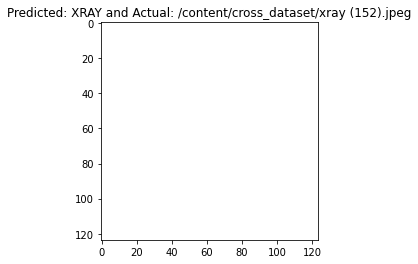

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


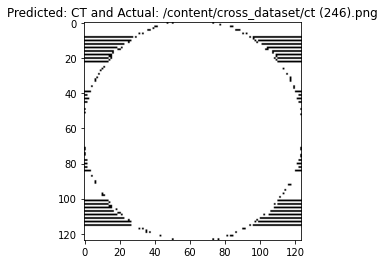

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


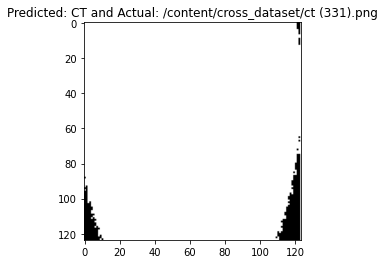

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


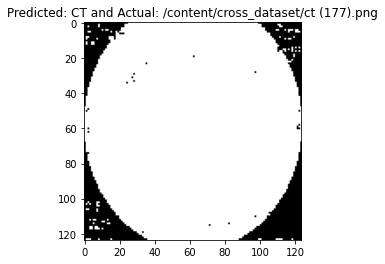

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.5243122e-04 9.9924755e-01]


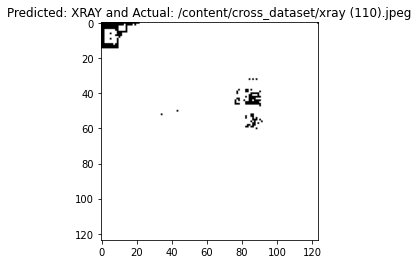

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


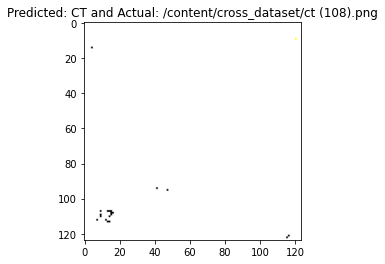

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


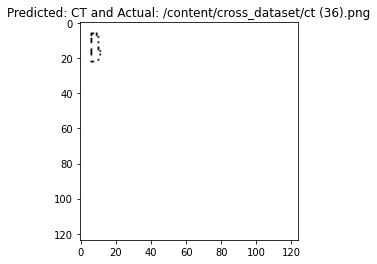

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


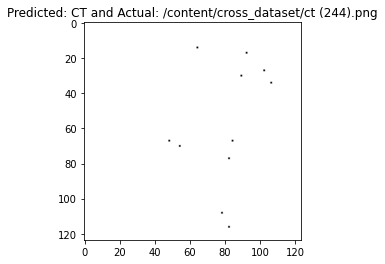

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.4949643e-04 9.9975055e-01]


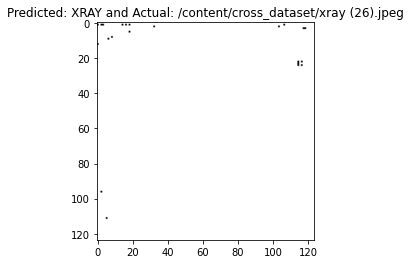

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


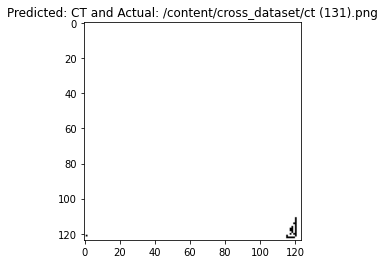

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


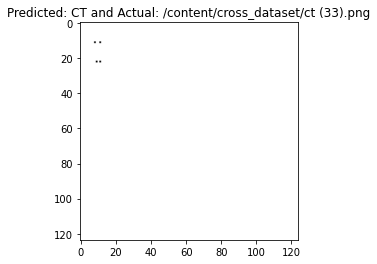

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


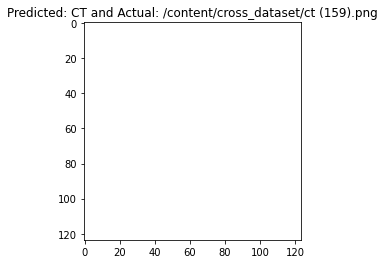

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


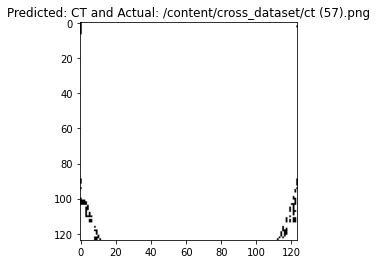

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00272142 0.99727863]


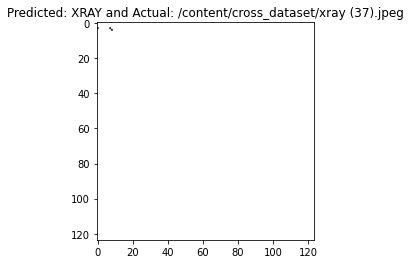

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


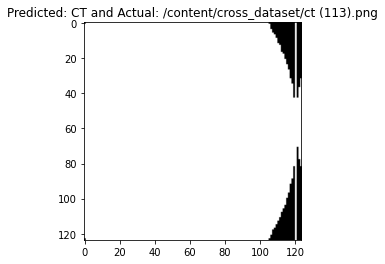

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.01174012 0.9882599 ]


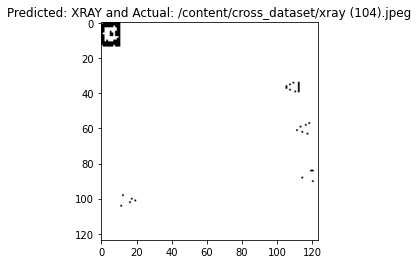

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00422817 0.9957718 ]


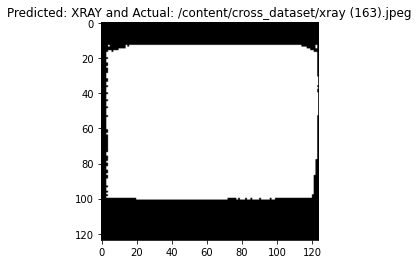

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.6363283e-04 9.9903643e-01]


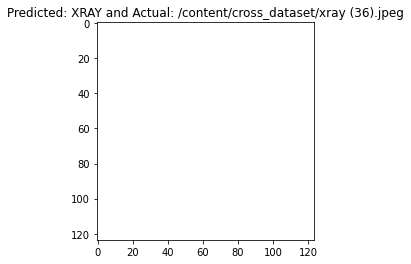

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


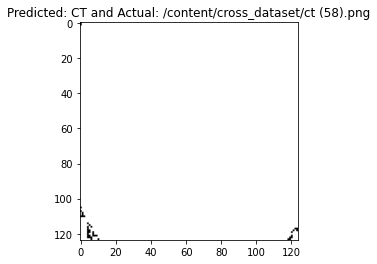

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


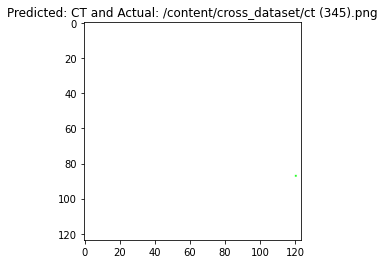

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2.7842674e-04 9.9972159e-01]


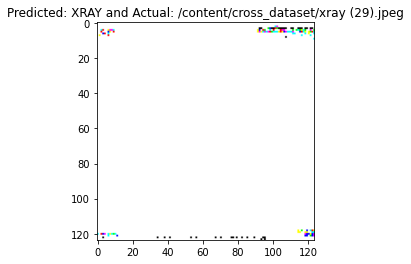

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8.3986743e-05 9.9991596e-01]


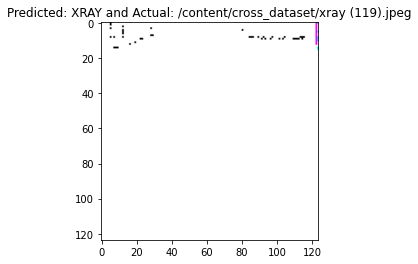

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


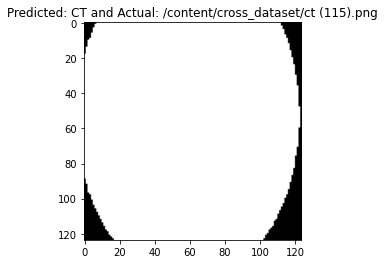

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.78478056 0.21521942]


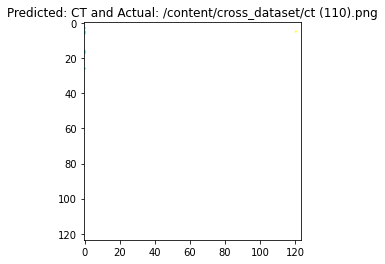

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


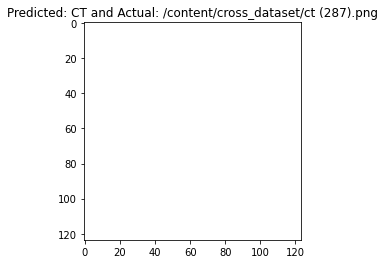

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


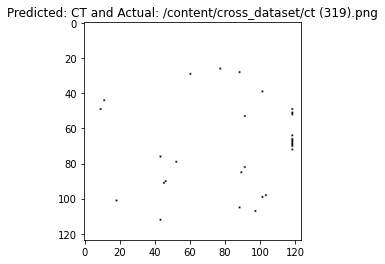

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.743321e-05 9.999026e-01]


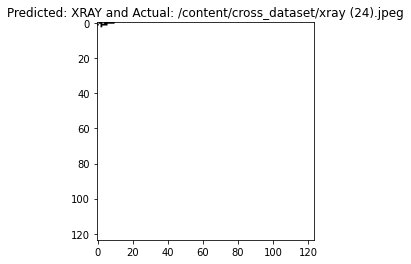

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


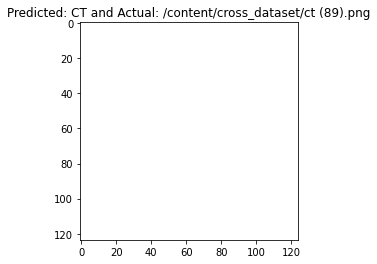

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


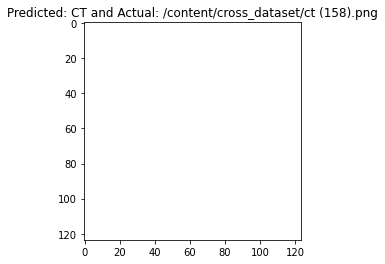

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


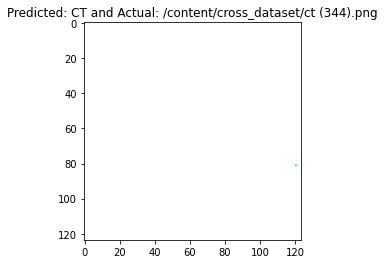

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


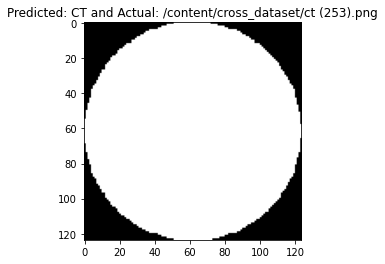

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


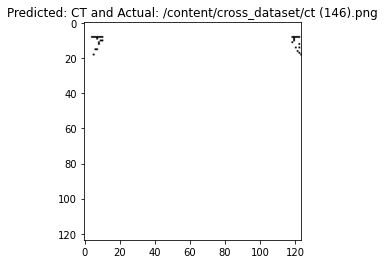

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.01743494 0.98256505]


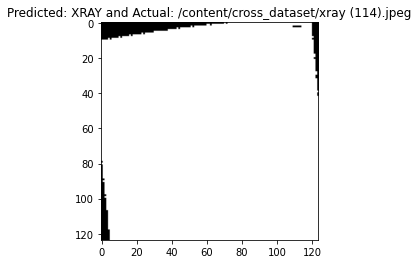

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


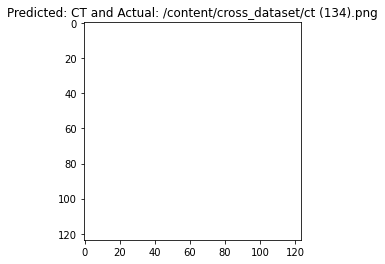

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4.2259690e-04 9.9957746e-01]


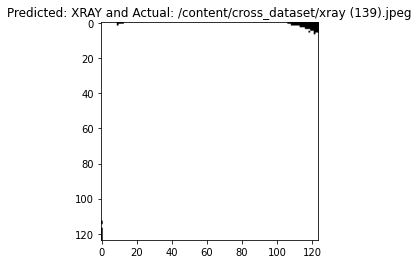

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


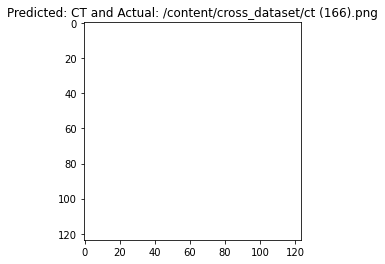

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


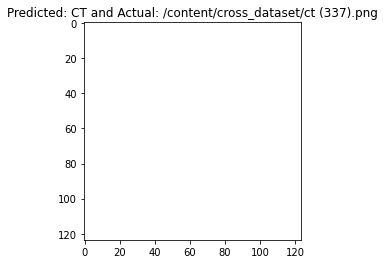

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


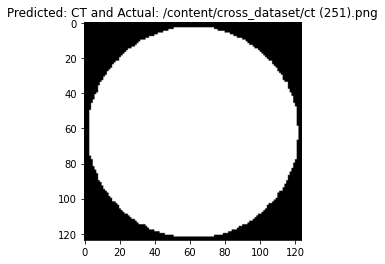

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


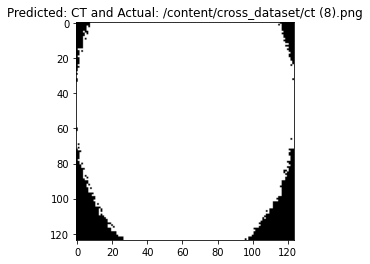

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


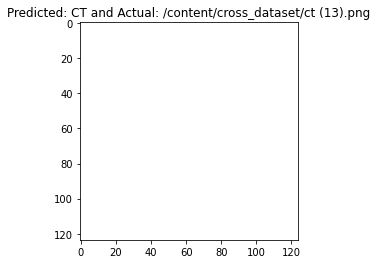

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


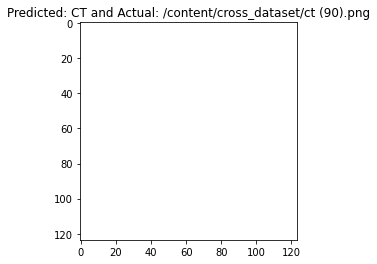

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


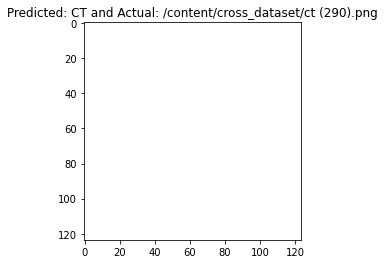

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


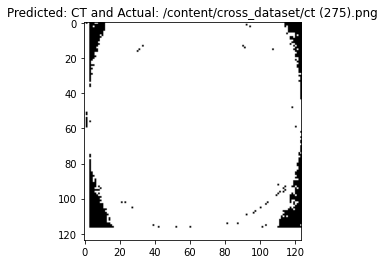

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


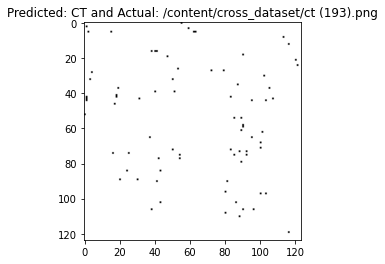

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


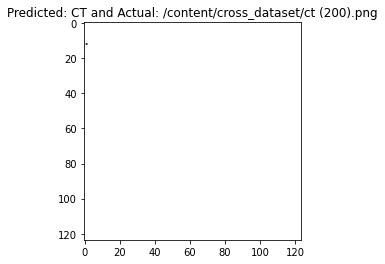

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


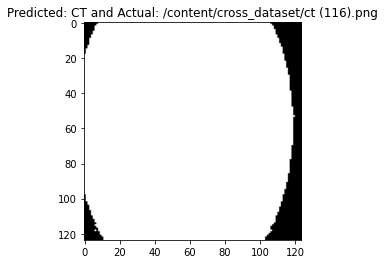

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00148529 0.9985147 ]


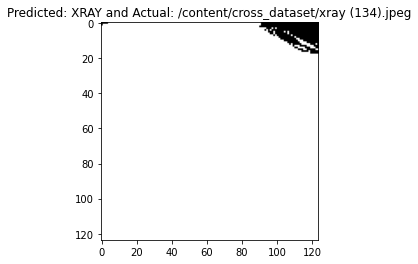

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6.696673e-04 9.993304e-01]


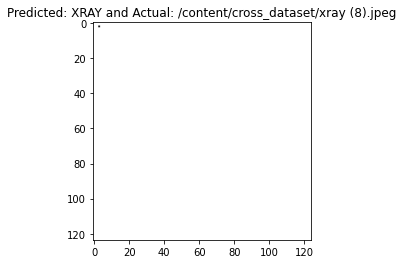

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


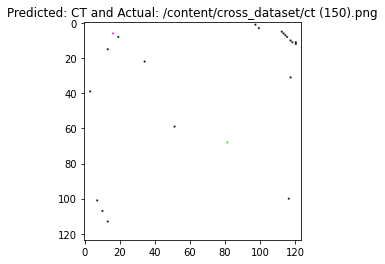

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00115652 0.99884343]


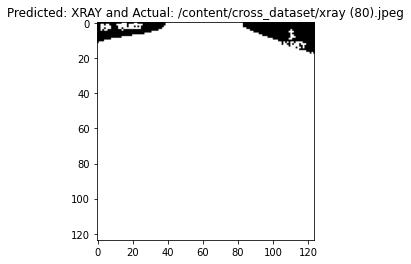

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00175071 0.9982493 ]


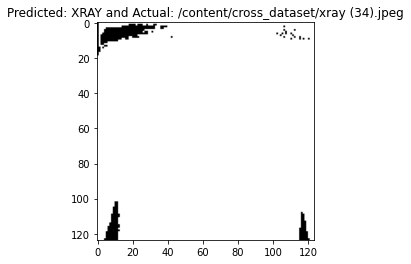

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


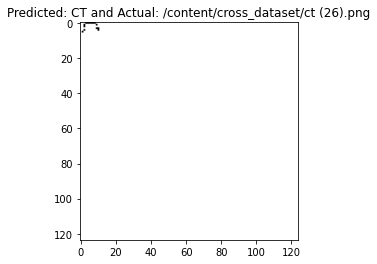

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00411186 0.9958882 ]


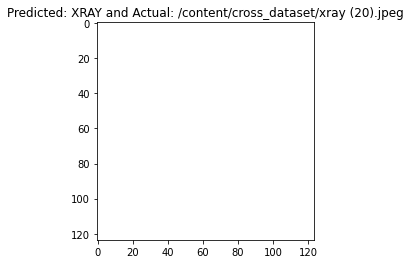

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


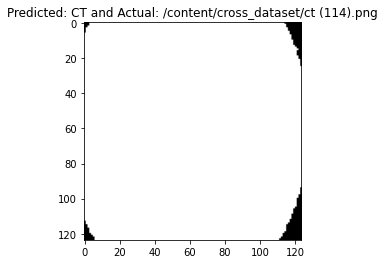

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7.188035e-05 9.999281e-01]


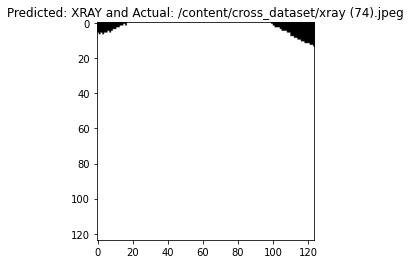

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


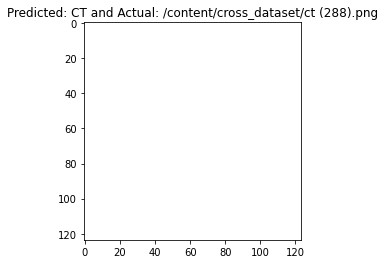

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


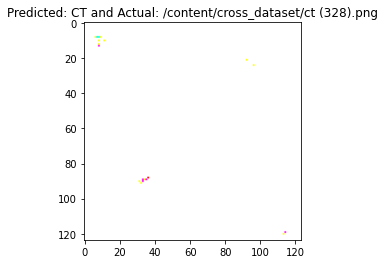

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


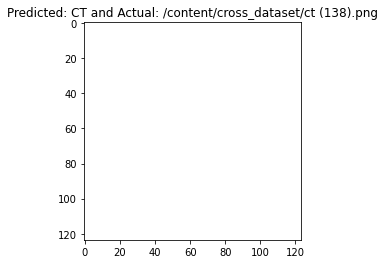

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


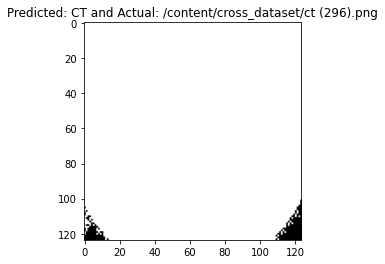

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.01094253 0.9890575 ]


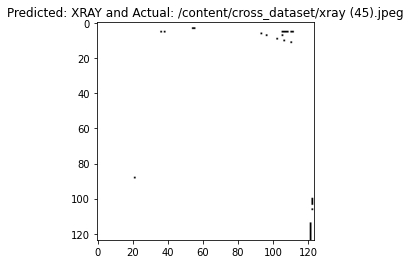

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


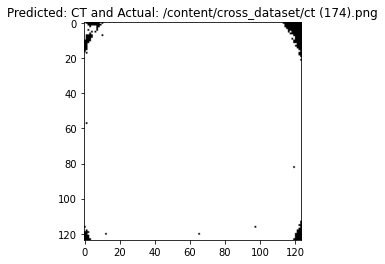

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.7497506e-04 9.9902499e-01]


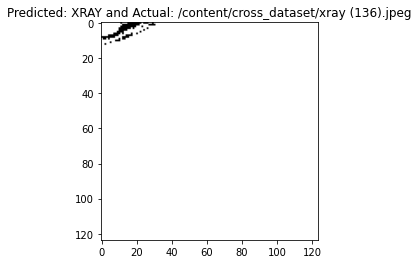

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.9468967e-04 9.9980539e-01]


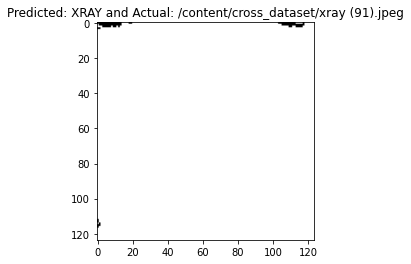

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.9166299e-04 9.9960834e-01]


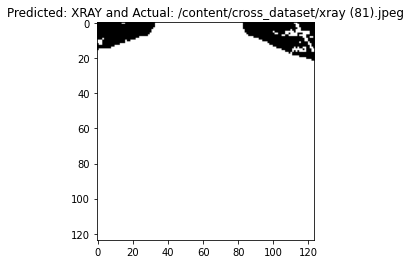

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.933542   0.06645792]


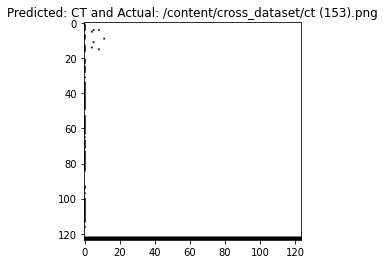

In [33]:
pred_labels = list()
for i in range(len(img_arr)):
  # if i==5:
  #   break
  img = np.expand_dims(img_arr[i],axis=0)
  pred = mymodel.predict(img/255)
  print(pred[0])
  max_pred = np.argmax(pred[0])
  plt.imshow(img_arr[i])
  if max_pred>0:
    plt.title('Predicted: XRAY and Actual: {0}'.format(dataset[i]))
    plt.show()
    pred_labels.append('XRAY')
  else:
    plt.title('Predicted: CT and Actual: {0}'.format(dataset[i]))
    plt.show()
    pred_labels.append('CT')

In [34]:
# picking up the target from path
target_labels = [item.split(' ')[0].split('/')[-1].upper() for item in dataset]
target_labels[:10]

['CT', 'CT', 'CT', 'XRAY', 'CT', 'CT', 'XRAY', 'XRAY', 'XRAY', 'CT']

In [35]:
output_df = pd.DataFrame(zip(dataset,target_labels,pred_labels),columns=['image_path','target_labels','pred_labels'])
output_df.head()

image_path target_labels pred_labels
0     /content/cross_dataset/ct (250).png            CT          CT
1      /content/cross_dataset/ct (72).png            CT          CT
2     /content/cross_dataset/ct (107).png            CT          CT
3  /content/cross_dataset/xray (142).jpeg          XRAY        XRAY
4     /content/cross_dataset/ct (178).png            CT          CT

In [36]:
# saving this output df to csv for future use
output_df.to_csv('./cross_dataset_outcome.csv',index=False)

In [45]:
# changing the categorical values of target labels to binary values
output_df['target_labels'] = output_df['target_labels'].map({'CT':0,'XRAY':1})
output_df.head()

image_path  target_labels pred_labels
0     /content/cross_dataset/ct (250).png              0          CT
1      /content/cross_dataset/ct (72).png              0          CT
2     /content/cross_dataset/ct (107).png              0          CT
3  /content/cross_dataset/xray (142).jpeg              1        XRAY
4     /content/cross_dataset/ct (178).png              0          CT

In [46]:
# changing the categorical values of pred labels to binary values
output_df['pred_labels'] = output_df['pred_labels'].map({'CT':0,'XRAY':1})
output_df.head()

image_path  target_labels  pred_labels
0     /content/cross_dataset/ct (250).png              0            0
1      /content/cross_dataset/ct (72).png              0            0
2     /content/cross_dataset/ct (107).png              0            0
3  /content/cross_dataset/xray (142).jpeg              1            1
4     /content/cross_dataset/ct (178).png              0            0

In [49]:
# classification report on cross dataset
mat = confusion_matrix(output_df['target_labels'].values,
                       output_df['pred_labels'].values,
                       )
mat

array([[349,   0],
       [  0, 167]])

[Text(0, 0.5, 'CT Images'), Text(0, 1.5, 'XRay Images')]

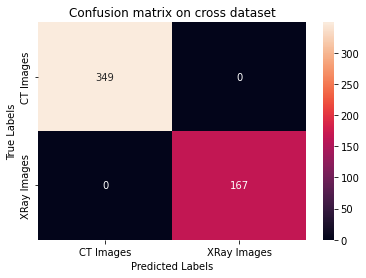

In [50]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(mat,annot=True,fmt='g',ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix on cross dataset')
ax.xaxis.set_ticklabels(['CT Images','XRay Images'])
ax.yaxis.set_ticklabels(['CT Images','XRay Images'])

In [51]:
# Showing classificaiton report on cross dataset
print('Classificaiton Report')
target_labels = ['CT Images','XRay Images']
print(classification_report(output_df['target_labels'].values,
                            output_df['pred_labels'].values,
                            target_names=target_labels))

Classificaiton Report
              precision    recall  f1-score   support

   CT Images       1.00      1.00      1.00       349
 XRay Images       1.00      1.00      1.00       167

    accuracy                           1.00       516
   macro avg       1.00      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516

